## **Reading csv and checking for missing values**

✅ Dataset loaded successfully!

📊 DATASET OVERVIEW
Shape: (2930, 82)
Memory usage: 7.76 MB

🔍 FIRST 5 ROWS
    Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         

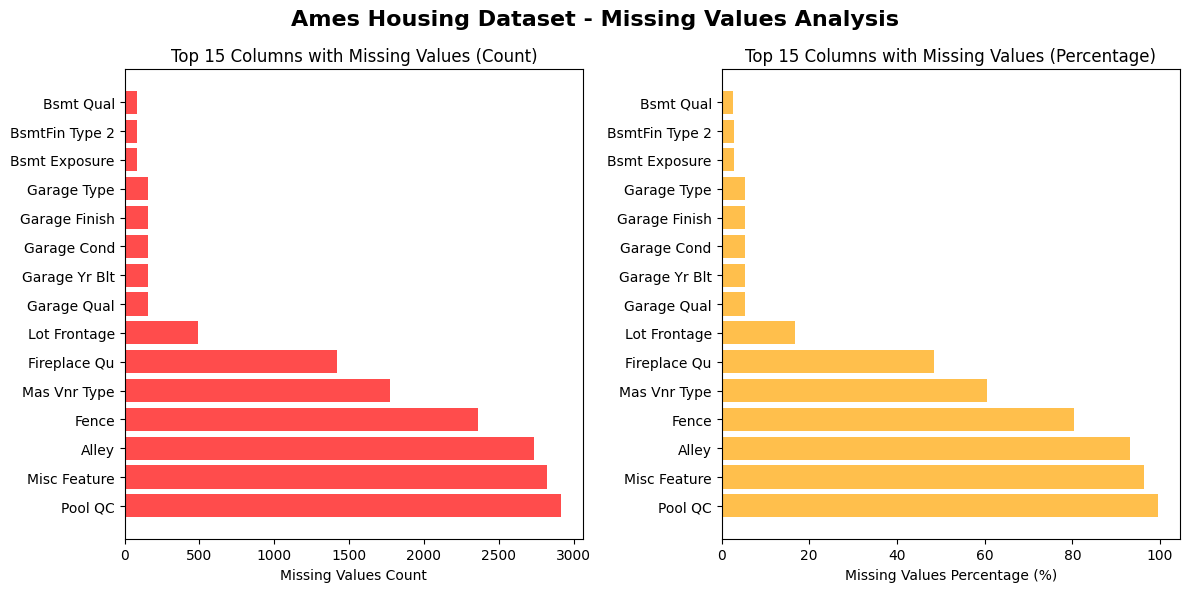

✅ Visualization completed!

🎉 ANALYSIS COMPLETE!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
try:
    df = pd.read_csv('AmesHousing.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'AmesHousing.csv' file not found.")
    exit()

# Basic dataset information
print(f"\n📊 DATASET OVERVIEW\nShape: {df.shape}\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n🔍 FIRST 5 ROWS\n", df.head())

# Missing value analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values,
    'Data_Type': df.dtypes.values
}).sort_values('Missing_Count', ascending=False)

missing_cols = missing_df[missing_df['Missing_Count'] > 0]

if not missing_cols.empty:
    print(f"\n📈 COLUMNS WITH MISSING VALUES: {len(missing_cols)}")
    print(f"Total missing values: {missing_data.sum():,}\nOverall missing data percentage: {missing_data.sum() / (len(df) * len(df.columns)) * 100:.2f}%")
    print(f"{'Column Name':<20} {'Missing Count':<15} {'Missing %':<12} {'Data Type':<15}")
    for _, row in missing_cols.iterrows():
        print(f"{row['Column']:<20} {row['Missing_Count']:<15} {row['Missing_Percentage']:<12.2f} {str(row['Data_Type']):<15}")
else:
    print("✅ No missing values found in the dataset!")

# Create bar plots for missing values
if len(missing_cols) > 0:
    print(f"\n📊 CREATING MISSING VALUES VISUALIZATION...")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle('Ames Housing Dataset - Missing Values Analysis', fontsize=16, fontweight='bold')

    # Bar plot of missing values count
    axes[0].barh(missing_cols['Column'].head(15), missing_cols['Missing_Count'].head(15), color='red', alpha=0.7)
    axes[0].set_xlabel('Missing Values Count')
    axes[0].set_title('Top 15 Columns with Missing Values (Count)')

    # Bar plot of missing values percentage
    axes[1].barh(missing_cols['Column'].head(15), missing_cols['Missing_Percentage'].head(15), color='orange', alpha=0.7)
    axes[1].set_xlabel('Missing Values Percentage (%)')
    axes[1].set_title('Top 15 Columns with Missing Values (Percentage)')

    plt.tight_layout()
    plt.show()

    print("✅ Visualization completed!")

print(f"\n🎉 ANALYSIS COMPLETE!")


## **Filling missing values**

In [16]:
import pandas as pd
import numpy as np

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Identify columns with more than 50% missing values
cols_to_drop = missing_percent[missing_percent > 50].index.tolist()


if 'Fireplace Qu' in df.columns:
    cols_to_drop.append('Fireplace Qu')

# Drop the identified columns
df.drop(columns=cols_to_drop, inplace=True)

# Get numerical and categorical columns after dropping
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Function to check outliers using IQR method
def has_outliers(series):
    if series.isnull().all():
        # If column is all nulls, treat as no outliers for filling step purposes
        return False
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return not outliers.empty

# Fill missing values in numerical columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        if has_outliers(df[col]):
            # Fill missing with median if outliers present
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            # Fill missing with mean if no outliers
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode(dropna=True)
        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)
        else:
            # If mode cannot be determined (all nan?), fill with a placeholder
            df[col].fillna('Missing', inplace=True)

print("✅ Columns with >50% missing and 'Fireplace Qu' dropped.")
print("✅ Missing values in numerical columns filled with mean or median depending on outliers.")
print("✅ Missing values in categorical columns filled with mode.")



✅ Columns with >50% missing and 'Fireplace Qu' dropped.
✅ Missing values in numerical columns filled with mean or median depending on outliers.
✅ Missing values in categorical columns filled with mode.


## **One hot encoding categorical columns**

In [17]:
import pandas as pd
import numpy as np

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ One-hot encoding of categorical columns completed.")
print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape after encoding: {df_encoded.shape}")

# If you want to use df_encoded forward, assign back to df
df = df_encoded



✅ One-hot encoding of categorical columns completed.
Original dataframe shape: (2930, 76)
New dataframe shape after encoding: (2930, 245)


In [18]:
# One-hot encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns from True/False to 1/0 after encoding
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


## **Normalizing numerical columns**

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Assume df is your dataframe after encoding and bool->int conversion

# Exclude 'Order' column
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('Order')

# Detect binary numeric columns (unique values subset of {0,1})
binary_cols = [col for col in num_cols if set(df[col].dropna().unique()).issubset({0,1})]

# Numerical columns to normalize (excluding binary)
cols_to_normalize = [col for col in num_cols if col not in binary_cols]

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the columns to normalize
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print(f"✅ Normalized {len(cols_to_normalize)} numerical columns excluding 'Order' and binary columns.")


✅ Normalized 38 numerical columns excluding 'Order' and binary columns.


## **Feature Selection**

🚀 COMPREHENSIVE FEATURE SELECTION PIPELINE
Starting with 245 features
Training set: (2344, 243)
Test set: (586, 243)

🔍 PHASE 1: INITIAL FILTERING

1️⃣ VARIANCE THRESHOLD FILTERING
   • Features removed (low variance): 95
   • Features remaining: 148
   • Removed features: ['Lot Frontage', 'Lot Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Kitchen AbvGr', 'Garage Yr Blt', 'Wood Deck SF']...

2️⃣ CORRELATION ANALYSIS
   • Highly correlated pairs found: 4
   • Features to remove: 4
   • Top 5 highly correlated pairs:
     - Sale Type_New <-> Sale Condition_Partial: 0.985
     - Exterior 1st_CemntBd <-> Exterior 2nd_CmentBd: 0.983
     - Exterior 1st_VinylSd <-> Exterior 2nd_VinylSd: 0.978
     - Exterior 1st_MetalSd <-> Exterior 2nd_MetalSd: 0.970
   • Features after correlation filtering: 144

3️⃣ STATISTICAL TESTS
   📊 F-Regression Test
   • Top features selected by F-test: 100
   📊 Mutual Information Test
   • Top features selected by MI: 100

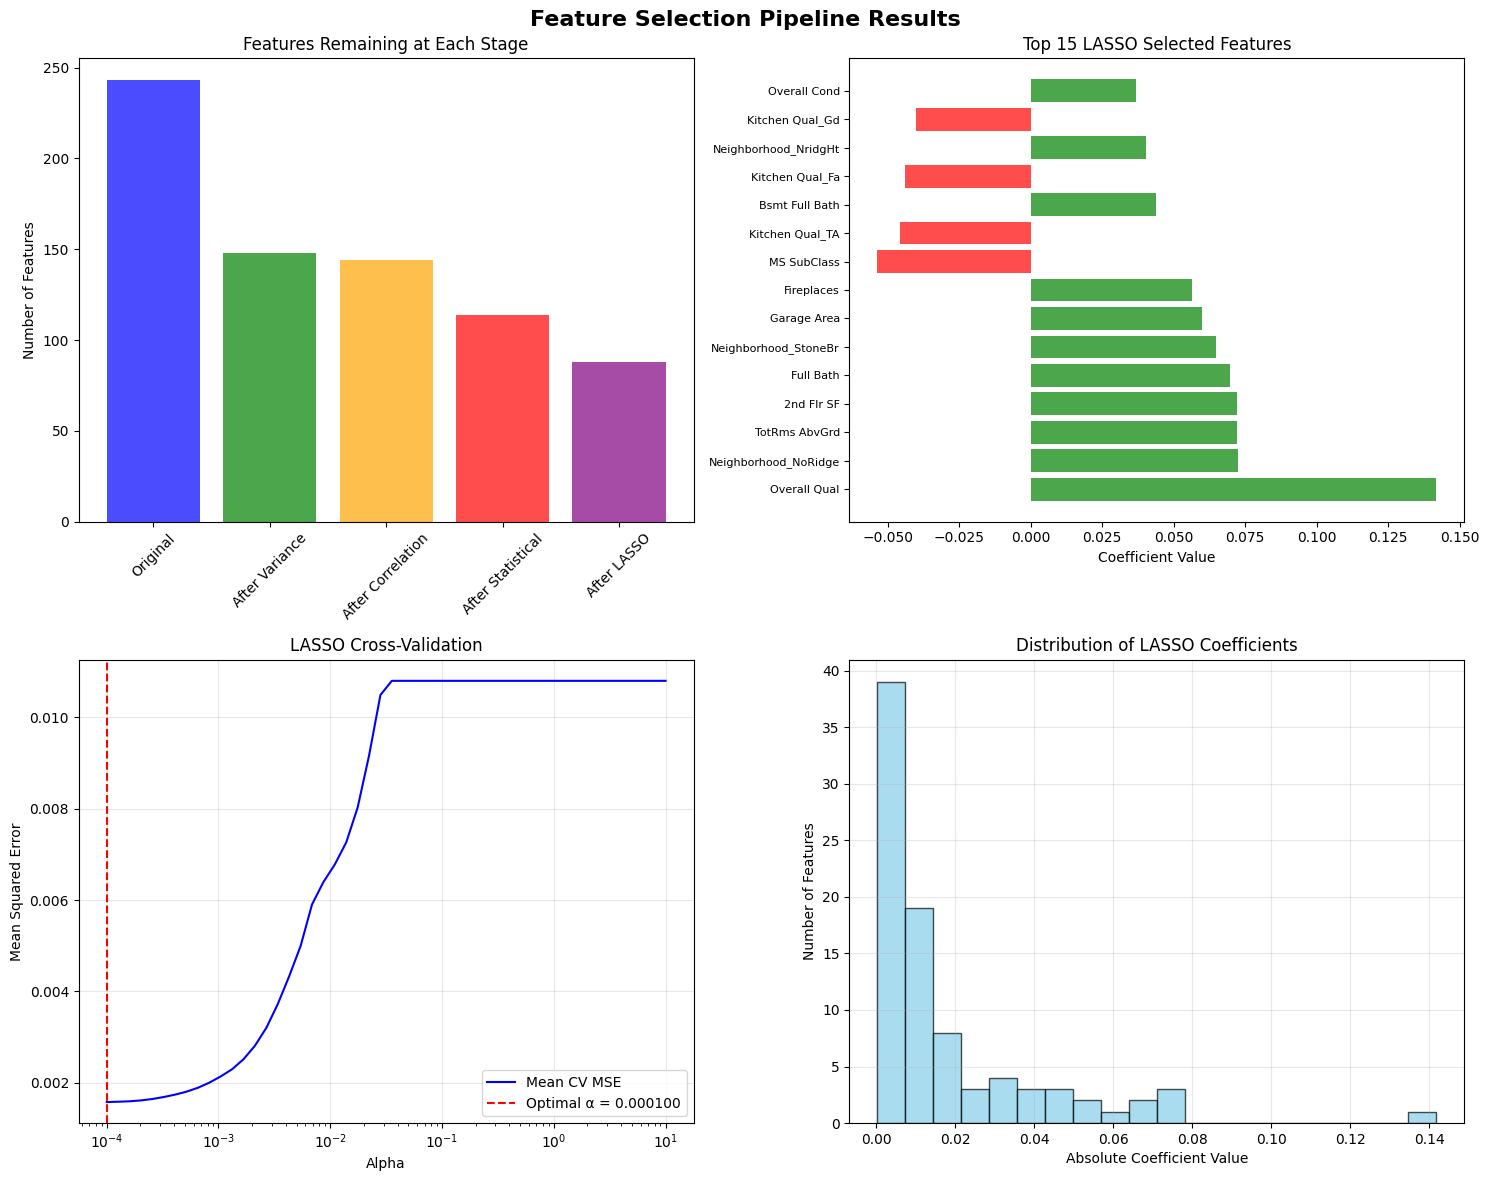


🎯 FINAL SELECTED FEATURES (88):
Top 20 Most Important:
Feature                                  Coefficient  Abs Coeff   
-----------------------------------------------------------------
Overall Qual                             0.141837     0.141837    
Neighborhood_NoRidge                     0.072464     0.072464    
TotRms AbvGrd                            0.072273     0.072273    
2nd Flr SF                               0.072182     0.072182    
Full Bath                                0.069826     0.069826    
Neighborhood_StoneBr                     0.064847     0.064847    
Garage Area                              0.059824     0.059824    
Fireplaces                               0.056438     0.056438    
MS SubClass                              -0.053624    0.053624    
Kitchen Qual_TA                          -0.045586    0.045586    
Bsmt Full Bath                           0.043821     0.043821    
Kitchen Qual_Fa                          -0.043803    0.043803    
Neighbo

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import (
    f_regression, mutual_info_regression,
    SelectKBest, VarianceThreshold, SelectFromModel
)
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Assuming your preprocessed dataframe is 'df' with target 'SalePrice'
print("🚀 COMPREHENSIVE FEATURE SELECTION PIPELINE")
print(f"Starting with {df.shape[1]} features")

# Prepare data
X = df.drop(['SalePrice', 'Order'], axis=1, errors='ignore')
y = df['SalePrice'] if 'SalePrice' in df.columns else df.iloc[:, -1]  # Adjust target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# ============================================================================
# PHASE 1: INITIAL FILTERING
# ============================================================================
print("\n" + "="*60)
print("🔍 PHASE 1: INITIAL FILTERING")
print("="*60)

# Step 1: Variance Threshold - Remove low variance features
print("\n1️⃣ VARIANCE THRESHOLD FILTERING")
variance_threshold = VarianceThreshold(threshold=0.01)  # Remove features with <1% variance
X_train_variance = variance_threshold.fit_transform(X_train)
X_test_variance = variance_threshold.transform(X_test)

low_variance_features = X.columns[~variance_threshold.get_support()].tolist()
remaining_features = X.columns[variance_threshold.get_support()].tolist()

print(f"   • Features removed (low variance): {len(low_variance_features)}")
print(f"   • Features remaining: {len(remaining_features)}")
if len(low_variance_features) > 0:
    print(f"   • Removed features: {low_variance_features[:10]}...")  # Show first 10

# Update feature names for remaining steps
X_train_filtered = pd.DataFrame(X_train_variance, columns=remaining_features, index=X_train.index)
X_test_filtered = pd.DataFrame(X_test_variance, columns=remaining_features, index=X_test.index)

# Step 2: Correlation Analysis - Remove highly correlated features
print("\n2️⃣ CORRELATION ANALYSIS")
correlation_threshold = 0.95

# Calculate correlation matrix
corr_matrix = X_train_filtered.corr().abs()

# Find highly correlated pairs
highly_correlated_pairs = []
correlated_features_to_remove = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            highly_correlated_pairs.append((feature1, feature2, corr_matrix.iloc[i, j]))

            # Keep the feature with higher correlation to target
            corr_target1 = abs(X_train_filtered[feature1].corr(y_train))
            corr_target2 = abs(X_train_filtered[feature2].corr(y_train))

            if corr_target1 < corr_target2:
                correlated_features_to_remove.add(feature1)
            else:
                correlated_features_to_remove.add(feature2)

print(f"   • Highly correlated pairs found: {len(highly_correlated_pairs)}")
print(f"   • Features to remove: {len(correlated_features_to_remove)}")

if len(highly_correlated_pairs) > 0:
    print("   • Top 5 highly correlated pairs:")
    for pair in sorted(highly_correlated_pairs, key=lambda x: x[2], reverse=True)[:5]:
        print(f"     - {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

# Remove highly correlated features
features_after_corr = [f for f in remaining_features if f not in correlated_features_to_remove]
X_train_corr = X_train_filtered[features_after_corr]
X_test_corr = X_test_filtered[features_after_corr]

print(f"   • Features after correlation filtering: {len(features_after_corr)}")

# Step 3: Statistical Tests
print("\n3️⃣ STATISTICAL TESTS")

# F-regression test
print("   📊 F-Regression Test")
f_scores, f_pvalues = f_regression(X_train_corr, y_train)
f_results = pd.DataFrame({
    'Feature': features_after_corr,
    'F_Score': f_scores,
    'P_Value': f_pvalues
}).sort_values('F_Score', ascending=False)

# Select top features based on F-test
f_selector = SelectKBest(score_func=f_regression, k=min(100, len(features_after_corr)))
X_train_f = f_selector.fit_transform(X_train_corr, y_train)
X_test_f = f_selector.transform(X_test_corr)
f_selected_features = f_selector.get_feature_names_out(features_after_corr)

print(f"   • Top features selected by F-test: {len(f_selected_features)}")

# Mutual Information test
print("   📊 Mutual Information Test")
mi_scores = mutual_info_regression(X_train_corr, y_train, random_state=42)
mi_results = pd.DataFrame({
    'Feature': features_after_corr,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

# Select top features based on Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_regression, k=min(100, len(features_after_corr)))
X_train_mi = mi_selector.fit_transform(X_train_corr, y_train)
X_test_mi = mi_selector.transform(X_test_corr)
mi_selected_features = mi_selector.get_feature_names_out(features_after_corr)

print(f"   • Top features selected by MI: {len(mi_selected_features)}")

# Combine F-test and MI results
combined_statistical_features = list(set(f_selected_features) | set(mi_selected_features))
print(f"   • Combined statistical features: {len(combined_statistical_features)}")

# ============================================================================
# PHASE 2: MODEL-SPECIFIC SELECTION (LASSO)
# ============================================================================
print("\n" + "="*60)
print("🎯 PHASE 2: MODEL-SPECIFIC SELECTION - LASSO")
print("="*60)

# Use features from Phase 1 for LASSO
X_train_phase1 = X_train_corr[combined_statistical_features]
X_test_phase1 = X_test_corr[combined_statistical_features]

print(f"Input features for LASSO: {X_train_phase1.shape[1]}")

# LASSO with Cross-Validation for optimal alpha
print("\n🔍 Finding Optimal Alpha with Cross-Validation")
alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=2000)
lasso_cv.fit(X_train_phase1, y_train)

optimal_alpha = lasso_cv.alpha_
print(f"✅ Optimal alpha: {optimal_alpha:.6f}")

# Fit LASSO with optimal alpha
lasso = Lasso(alpha=optimal_alpha, random_state=42, max_iter=2000)
lasso.fit(X_train_phase1, y_train)

# Get LASSO selected features
lasso_feature_importance = pd.DataFrame({
    'Feature': X_train_phase1.columns,
    'Coefficient': lasso.coef_,
    'Abs_Coefficient': np.abs(lasso.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

lasso_selected_features = lasso_feature_importance[lasso_feature_importance['Coefficient'] != 0]
lasso_feature_names = lasso_selected_features['Feature'].tolist()

print(f"\n📈 LASSO RESULTS:")
print(f"   • Features selected by LASSO: {len(lasso_selected_features)}")
print(f"   • Features eliminated: {X_train_phase1.shape[1] - len(lasso_selected_features)}")
print(f"   • Reduction: {((X_train_phase1.shape[1] - len(lasso_selected_features)) / X_train_phase1.shape[1] * 100):.1f}%")

# ============================================================================
# RESULTS SUMMARY & VISUALIZATION
# ============================================================================
print("\n" + "="*60)
print("📊 FEATURE SELECTION SUMMARY")
print("="*60)

summary_df = pd.DataFrame({
    'Stage': ['Original', 'After Variance', 'After Correlation', 'After Statistical', 'After LASSO'],
    'Features': [X.shape[1], len(remaining_features), len(features_after_corr),
                len(combined_statistical_features), len(lasso_selected_features)],
    'Reduction': [0, X.shape[1] - len(remaining_features),
                 len(remaining_features) - len(features_after_corr),
                 len(features_after_corr) - len(combined_statistical_features),
                 len(combined_statistical_features) - len(lasso_selected_features)]
})

print(summary_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Selection Pipeline Results', fontsize=16, fontweight='bold')

# 1. Feature count reduction
axes[0,0].bar(summary_df['Stage'], summary_df['Features'], color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
axes[0,0].set_title('Features Remaining at Each Stage')
axes[0,0].set_ylabel('Number of Features')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Top LASSO features
top_lasso = lasso_selected_features.head(15)
colors = ['green' if coef > 0 else 'red' for coef in top_lasso['Coefficient']]
axes[0,1].barh(range(len(top_lasso)), top_lasso['Coefficient'], color=colors, alpha=0.7)
axes[0,1].set_yticks(range(len(top_lasso)))
axes[0,1].set_yticklabels(top_lasso['Feature'], fontsize=8)
axes[0,1].set_title('Top 15 LASSO Selected Features')
axes[0,1].set_xlabel('Coefficient Value')

# 3. Cross-validation curve
axes[1,0].semilogx(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), 'b-', label='Mean CV MSE')
axes[1,0].axvline(optimal_alpha, color='red', linestyle='--', label=f'Optimal α = {optimal_alpha:.6f}')
axes[1,0].set_xlabel('Alpha')
axes[1,0].set_ylabel('Mean Squared Error')
axes[1,0].set_title('LASSO Cross-Validation')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Feature importance distribution
axes[1,1].hist(lasso_selected_features['Abs_Coefficient'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].set_xlabel('Absolute Coefficient Value')
axes[1,1].set_ylabel('Number of Features')
axes[1,1].set_title('Distribution of LASSO Coefficients')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final selected features
print(f"\n🎯 FINAL SELECTED FEATURES ({len(lasso_selected_features)}):")
print("Top 20 Most Important:")
print(f"{'Feature':<40} {'Coefficient':<12} {'Abs Coeff':<12}")
print("-" * 65)
for _, row in lasso_selected_features.head(20).iterrows():
    print(f"{row['Feature']:<40} {row['Coefficient']:<12.6f} {row['Abs_Coefficient']:<12.6f}")

# Create final dataset with selected features
X_final = X[lasso_feature_names]
print(f"\n✅ PIPELINE COMPLETED!")
print(f"Final dataset shape: {X_final.shape}")
print(f"Total reduction: {((X.shape[1] - X_final.shape[1]) / X.shape[1] * 100):.1f}%")

# FIX: Model performance check - Use the correct feature sets
# The LASSO model was trained on ALL 113 features from Phase 1, so we need to use those for prediction
y_pred_train = lasso.predict(X_train_phase1)  # Use ALL Phase 1 features
y_pred_test = lasso.predict(X_test_phase1)    # Use ALL Phase 1 features

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\n📊 LASSO MODEL PERFORMANCE:")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# ALTERNATIVE: If you want to train a new model with ONLY the selected features
print(f"\n🔄 ALTERNATIVE: Training new LASSO model with only selected features...")
lasso_final = Lasso(alpha=optimal_alpha, random_state=42, max_iter=2000)
X_train_final = X_train_phase1[lasso_feature_names]
X_test_final = X_test_phase1[lasso_feature_names]

lasso_final.fit(X_train_final, y_train)
y_pred_train_final = lasso_final.predict(X_train_final)
y_pred_test_final = lasso_final.predict(X_test_final)

train_r2_final = r2_score(y_train, y_pred_train_final)
test_r2_final = r2_score(y_test, y_pred_test_final)

print(f"📊 FINAL MODEL PERFORMANCE (with {len(lasso_feature_names)} features):")
print(f"Training R²: {train_r2_final:.4f}")
print(f"Testing R²: {test_r2_final:.4f}")

# Save results
lasso_selected_features.to_csv('phase1_phase2_selected_features.csv', index=False)
X_final.to_csv('final_selected_features_dataset.csv', index=False)

print(f"\n💾 FILES SAVED:")
print(f"• Selected features: 'phase1_phase2_selected_features.csv'")
print(f"• Final dataset: 'final_selected_features_dataset.csv'")
print(f"\n🚀 Ready for Phase 3: Model Training with {len(lasso_feature_names)} selected features!")

## **Model development and comparison**

In [21]:
pip install catboost

🚀 COMPREHENSIVE MODEL TRAINING PIPELINE
Training set shape: (2344, 88)
Test set shape: (586, 88)
Number of selected features: 88

📋 MODEL CATEGORIES:
🔍 INTERPRETABLE MODELS (White-box):
   • Linear Regression - Direct linear coefficients
   • Ridge Regression - Regularized linear coefficients
   • Decision Tree - Clear if-then rules and feature splits

⚫ BLACK-BOX MODELS:
   • Random Forest - Ensemble of trees
   • Gradient Boosting - Sequential boosting
   • XGBoost - Advanced gradient boosting
   • LightGBM - Optimized gradient boosting
   • CatBoost - Categorical boosting

📋 INITIALIZING MODELS...
✅ Initialized 8 models
   • Interpretable: 3 models
   • Black-box: 5 models

🔥 TRAINING MODELS...

🎯 Training Linear Regression...
   ✅ Linear Regression completed - Test R²: 0.8798, Test RMSE: 0.0418

🎯 Training Ridge Regression...
   ✅ Ridge Regression completed - Test R²: 0.8799, Test RMSE: 0.0418

🎯 Training Decision Tree...
   ✅ Decision Tree completed - Test R²: 0.7269, Test RMSE: 0

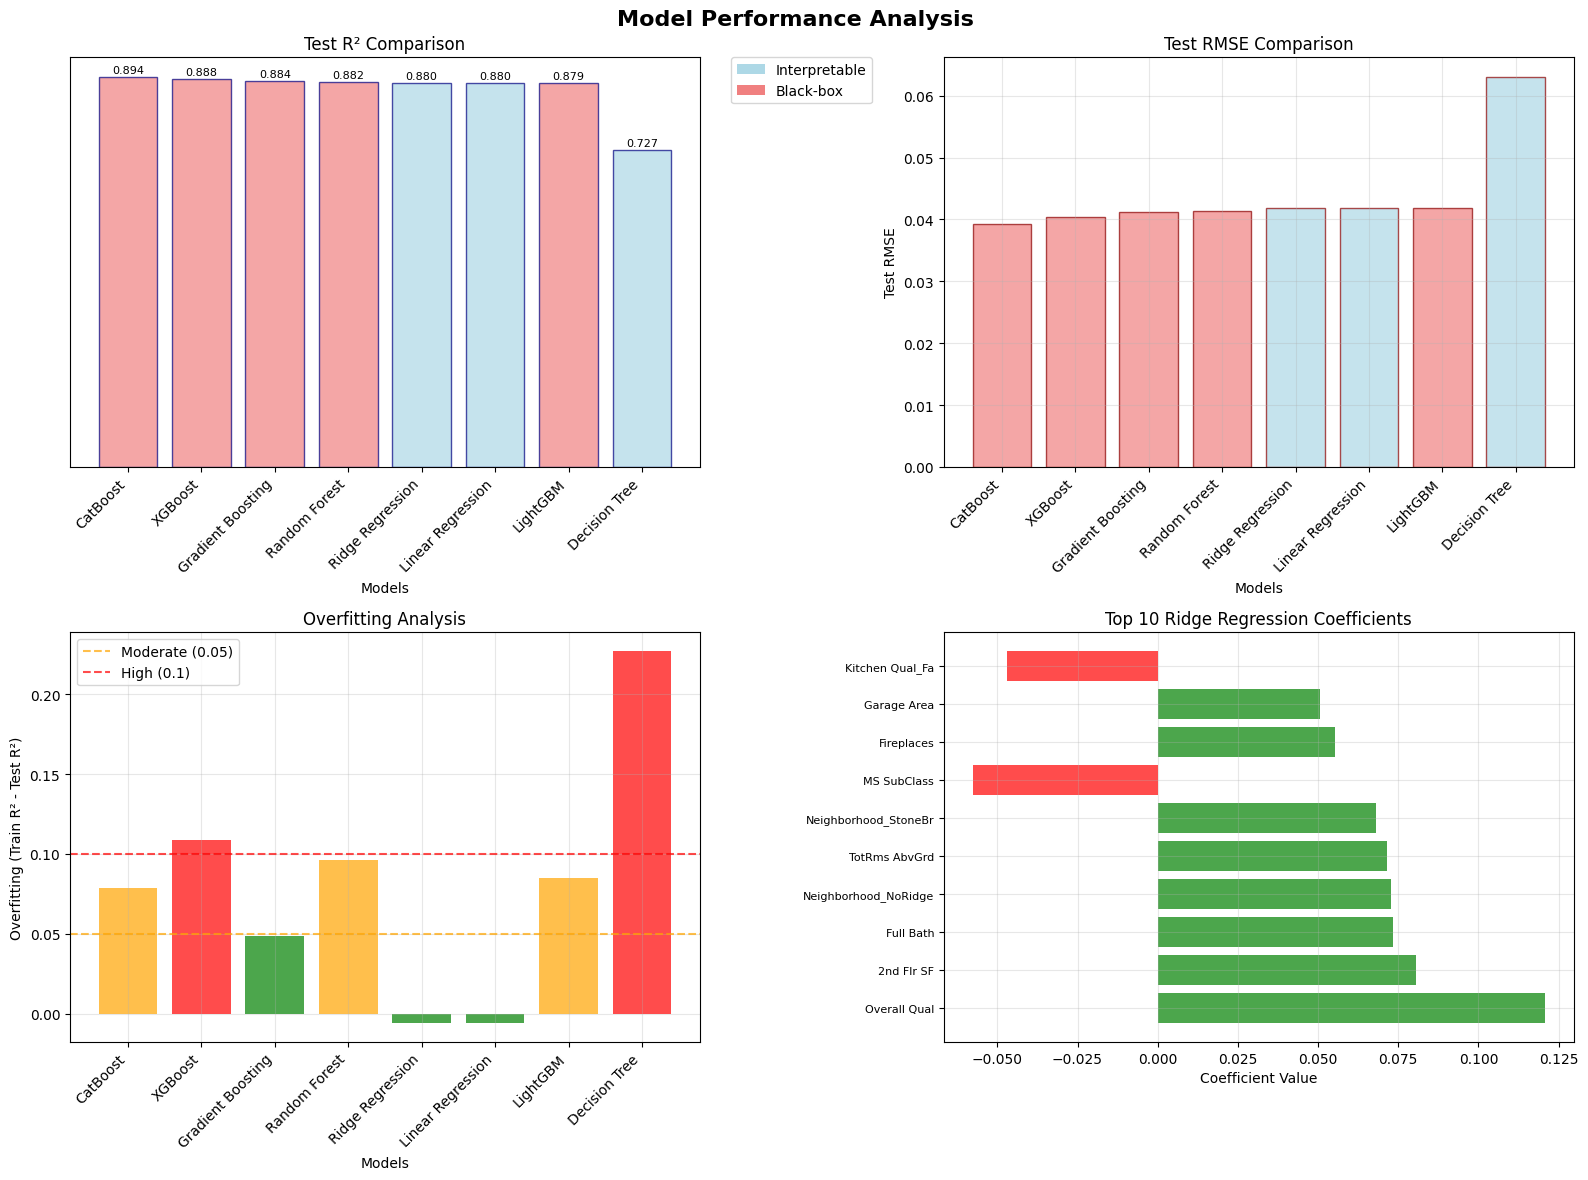


💾 SAVING RESULTS...
✅ Files saved:
• model_performance_results.csv
• interpretable_models_coefficients.xlsx (Only interpretable models)
• all_models_feature_analysis.xlsx (All models)

🎯 FINAL RECOMMENDATIONS

🏆 OVERALL BEST MODEL: CatBoost (Black-box)
   • Test R²: 0.8940
   • Test RMSE: 0.04
   • Overfitting: 0.0787

🔍 BEST INTERPRETABLE MODEL: Ridge Regression
   • Test R²: 0.8799
   • Test RMSE: 0.04
   • Overfitting: -0.0061

🚀 PIPELINE COMPLETED!
Trained and evaluated 8 models on 88 selected features.
✅ ElasticNet removed as requested
✅ Cross-validation graph removed as requested
✅ Coefficients extracted from all interpretable models
Check the saved files for detailed results and feature analysis.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings
warnings.filterwarnings('ignore')

print("🚀 COMPREHENSIVE MODEL TRAINING PIPELINE")
print("="*60)

# Assuming you have X_train_final, X_test_final, y_train, y_test from the feature selection step
# If not, use the selected features from your pipeline
print(f"Training set shape: {X_train_final.shape}")
print(f"Test set shape: {X_test_final.shape}")
print(f"Number of selected features: {X_train_final.shape[1]}")

# ============================================================================
# MODEL CATEGORIES
# ============================================================================
print("\n📋 MODEL CATEGORIES:")
print("🔍 INTERPRETABLE MODELS (White-box):")
print("   • Linear Regression - Direct linear coefficients")
print("   • Ridge Regression - Regularized linear coefficients")
print("   • Decision Tree - Clear if-then rules and feature splits")

print("\n⚫ BLACK-BOX MODELS:")
print("   • Random Forest - Ensemble of trees")
print("   • Gradient Boosting - Sequential boosting")
print("   • XGBoost - Advanced gradient boosting")
print("   • LightGBM - Optimized gradient boosting")
print("   • CatBoost - Categorical boosting")

# ============================================================================
# MODEL DEFINITIONS
# ============================================================================
print("\n📋 INITIALIZING MODELS...")

# Interpretable Models (White-box)
interpretable_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10)
}

# Black-box Models
blackbox_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=100,
        random_state=42,
        eval_metric='rmse',
        verbosity=0
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=100,
        random_state=42,
        verbose=-1,
        force_row_wise=True
    ),
    'CatBoost': cb.CatBoostRegressor(
        iterations=100,
        random_state=42,
        verbose=False
    )
}

# Combine all models
all_models = {**interpretable_models, **blackbox_models}

print(f"✅ Initialized {len(all_models)} models")
print(f"   • Interpretable: {len(interpretable_models)} models")
print(f"   • Black-box: {len(blackbox_models)} models")

# ============================================================================
# MODEL TRAINING AND EVALUATION
# ============================================================================
print("\n🔥 TRAINING MODELS...")

results = []
feature_coefficients = {}
model_objects = {}

for name, model in all_models.items():
    print(f"\n🎯 Training {name}...")

    try:
        # Train the model
        model.fit(X_train_final, y_train)
        model_objects[name] = model

        # Make predictions
        y_pred_train = model.predict(X_train_final)
        y_pred_test = model.predict(X_test_final)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

        # Cross-validation R²
        cv_scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='r2', n_jobs=-1)
        cv_r2_mean = cv_scores.mean()
        cv_r2_std = cv_scores.std()

        # Overfitting Analysis: Train R² - Test R²
        overfitting = train_r2 - test_r2

        # Store results
        results.append({
            'Model': name,
            'Category': 'Interpretable' if name in interpretable_models else 'Black-box',
            'Train_R2': train_r2,
            'Test_R2': test_r2,
            'Train_RMSE': train_rmse,
            'Test_RMSE': test_rmse,
            'CV_R2_Mean': cv_r2_mean,
            'CV_R2_Std': cv_r2_std,
            'Overfitting': overfitting
        })

        # Extract feature coefficients/importance for ALL models
        feature_names = X_train_final.columns.tolist()

        if hasattr(model, 'coef_') and model.coef_ is not None:
            # Linear models with coefficients
            coeffs = model.coef_
            if len(coeffs.shape) > 1:
                coeffs = coeffs.flatten()

            coeff_df = pd.DataFrame({
                'Feature': feature_names,
                'Coefficient': coeffs,
                'Abs_Coefficient': np.abs(coeffs)
            }).sort_values('Abs_Coefficient', ascending=False)

            feature_coefficients[name] = coeff_df

        elif hasattr(model, 'feature_importances_'):
            # Tree-based models with feature importance
            importances = model.feature_importances_

            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances,
                'Abs_Importance': np.abs(importances)
            }).sort_values('Importance', ascending=False)

            feature_coefficients[name] = importance_df

        print(f"   ✅ {name} completed - Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")

    except Exception as e:
        print(f"   ❌ {name} failed: {str(e)}")
        continue

# ============================================================================
# RESULTS ANALYSIS
# ============================================================================
print("\n" + "="*60)
print("📊 MODEL PERFORMANCE SUMMARY")
print("="*60)

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

# Display results table
print("\n🏆 MODEL RANKING (by Test R²):")
print(f"{'Model':<20} {'Category':<13} {'Train R²':<10} {'Test R²':<10} {'Train RMSE':<12} {'Test RMSE':<12} {'CV R² (±σ)':<15} {'Overfitting':<12}")
print("-" * 115)

for _, row in results_df.iterrows():
    print(f"{row['Model']:<20} {row['Category']:<13} {row['Train_R2']:<10.4f} {row['Test_R2']:<10.4f} "
          f"{row['Train_RMSE']:<12.2f} {row['Test_RMSE']:<12.2f} "
          f"{row['CV_R2_Mean']:.3f}±{row['CV_R2_Std']:.3f}   {row['Overfitting']:<12.4f}")

# ============================================================================
# OVERFITTING ANALYSIS EXPLANATION
# ============================================================================
print("\n" + "="*60)
print("🔍 OVERFITTING ANALYSIS EXPLANATION")
print("="*60)
print("📊 Overfitting = Train R² - Test R²")
print("🟢 < 0.05: Good generalization")
print("🟡 0.05-0.1: Moderate overfitting")
print("🔴 > 0.1: High overfitting")

# Categorize models by overfitting
good_models = results_df[results_df['Overfitting'] < 0.05]
moderate_models = results_df[(results_df['Overfitting'] >= 0.05) & (results_df['Overfitting'] <= 0.1)]
high_overfit_models = results_df[results_df['Overfitting'] > 0.1]

if len(good_models) > 0:
    print(f"\n🟢 GOOD GENERALIZATION ({len(good_models)} models):")
    for _, row in good_models.iterrows():
        print(f"   • {row['Model']}: {row['Overfitting']:.4f}")

if len(moderate_models) > 0:
    print(f"\n🟡 MODERATE OVERFITTING ({len(moderate_models)} models):")
    for _, row in moderate_models.iterrows():
        print(f"   • {row['Model']}: {row['Overfitting']:.4f}")

if len(high_overfit_models) > 0:
    print(f"\n🔴 HIGH OVERFITTING ({len(high_overfit_models)} models):")
    for _, row in high_overfit_models.iterrows():
        print(f"   • {row['Model']}: {row['Overfitting']:.4f}")

# ============================================================================
# FEATURE COEFFICIENTS FROM ALL INTERPRETABLE MODELS
# ============================================================================
print("\n" + "="*60)
print("🔍 FEATURE COEFFICIENTS FROM ALL INTERPRETABLE MODELS")
print("="*60)

# Display coefficients for ALL interpretable models
interpretable_model_names = list(interpretable_models.keys())

for model_name in interpretable_model_names:
    if model_name in feature_coefficients:
        print(f"\n📈 {model_name.upper()} COEFFICIENTS:")
        coeff_df = feature_coefficients[model_name]

        if 'Coefficient' in coeff_df.columns:
            # Linear models
            print(f"{'Feature':<35} {'Coefficient':<15} {'Abs Coefficient':<15}")
            print("-" * 65)

            for _, row in coeff_df.head(20).iterrows():
                print(f"{row['Feature']:<35} {row['Coefficient']:<15.6f} {row['Abs_Coefficient']:<15.6f}")

        elif 'Importance' in coeff_df.columns:
            # Decision Tree
            print(f"{'Feature':<35} {'Importance':<15}")
            print("-" * 50)

            for _, row in coeff_df.head(20).iterrows():
                print(f"{row['Feature']:<35} {row['Importance']:<15.6f}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n📊 GENERATING VISUALIZATIONS...")

# Create visualization without cross-validation graph
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Model Performance Comparison
# 1. Model Performance Comparison - Test R²
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
colors = ['lightblue' if cat == 'Interpretable' else 'lightcoral' for cat in results_df['Category']]
bars = ax1.bar(x_pos, results_df['Test_R2'], alpha=0.7, color=colors, edgecolor='navy')

ax1.set_xlabel('Models')
ax1.set_title('Test R² Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')

# Remove y-axis ticks/labels
ax1.set_yticks([])
ax1.set_ylabel('')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Add legend (shifted right)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='Interpretable'),
                   Patch(facecolor='lightcoral', label='Black-box')]
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1.0), borderaxespad=0.)

# Optional: Remove grid (optional aesthetic choice)
ax1.grid(False)


# 2. RMSE Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(x_pos, results_df['Test_RMSE'], alpha=0.7, color=colors, edgecolor='darkred')
ax2.set_xlabel('Models')
ax2.set_ylabel('Test RMSE')
ax2.set_title('Test RMSE Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# 3. Overfitting Analysis
ax3 = axes[1, 0]
overfit_colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in results_df['Overfitting']]
bars3 = ax3.bar(x_pos, results_df['Overfitting'], alpha=0.7, color=overfit_colors)
ax3.set_xlabel('Models')
ax3.set_ylabel('Overfitting (Train R² - Test R²)')
ax3.set_title('Overfitting Analysis')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate (0.05)')
ax3.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High (0.1)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Feature Coefficients for best interpretable model
best_interpretable = results_df[results_df['Category'] == 'Interpretable'].iloc[0]['Model']
if best_interpretable in feature_coefficients:
    ax4 = axes[1, 1]
    coeff_df = feature_coefficients[best_interpretable].head(10)

    if 'Coefficient' in coeff_df.columns:
        colors = ['green' if x > 0 else 'red' for x in coeff_df['Coefficient']]
        bars4 = ax4.barh(range(len(coeff_df)), coeff_df['Coefficient'], color=colors, alpha=0.7)
        ax4.set_xlabel('Coefficient Value')
        ax4.set_title(f'Top 10 {best_interpretable} Coefficients')
    else:
        bars4 = ax4.barh(range(len(coeff_df)), coeff_df['Importance'], color='forestgreen', alpha=0.7)
        ax4.set_xlabel('Importance')
        ax4.set_title(f'Top 10 {best_interpretable} Feature Importance')

    ax4.set_yticks(range(len(coeff_df)))
    ax4.set_yticklabels(coeff_df['Feature'], fontsize=8)
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SAVE RESULTS
# ============================================================================
print("\n💾 SAVING RESULTS...")

# Save model performance
results_df.to_csv('model_performance_results.csv', index=False)

# Save feature coefficients/importance for ALL interpretable models
with pd.ExcelWriter('interpretable_models_coefficients.xlsx') as writer:
    for model_name in interpretable_model_names:
        if model_name in feature_coefficients:
            coeff_df = feature_coefficients[model_name]
            coeff_df.to_excel(writer, sheet_name=model_name.replace(' ', '_')[:31], index=False)

# Save all feature coefficients/importance
with pd.ExcelWriter('all_models_feature_analysis.xlsx') as writer:
    for model_name, coeff_df in feature_coefficients.items():
        coeff_df.to_excel(writer, sheet_name=model_name.replace(' ', '_')[:31], index=False)

print("✅ Files saved:")
print("• model_performance_results.csv")
print("• interpretable_models_coefficients.xlsx (Only interpretable models)")
print("• all_models_feature_analysis.xlsx (All models)")

# ============================================================================
# FINAL RECOMMENDATIONS
# ============================================================================
print("\n" + "="*60)
print("🎯 FINAL RECOMMENDATIONS")
print("="*60)

best_model = results_df.iloc[0]
best_interpretable_model = results_df[results_df['Category'] == 'Interpretable'].iloc[0]

print(f"\n🏆 OVERALL BEST MODEL: {best_model['Model']} ({best_model['Category']})")
print(f"   • Test R²: {best_model['Test_R2']:.4f}")
print(f"   • Test RMSE: {best_model['Test_RMSE']:.2f}")
print(f"   • Overfitting: {best_model['Overfitting']:.4f}")

print(f"\n🔍 BEST INTERPRETABLE MODEL: {best_interpretable_model['Model']}")
print(f"   • Test R²: {best_interpretable_model['Test_R2']:.4f}")
print(f"   • Test RMSE: {best_interpretable_model['Test_RMSE']:.2f}")
print(f"   • Overfitting: {best_interpretable_model['Overfitting']:.4f}")

print(f"\n🚀 PIPELINE COMPLETED!")
print(f"Trained and evaluated {len(results)} models on {X_train_final.shape[1]} selected features.")
print("✅ ElasticNet removed as requested")
print("✅ Cross-validation graph removed as requested")
print("✅ Coefficients extracted from all interpretable models")
print("Check the saved files for detailed results and feature analysis.")

## **XAI on blackbox models**

✅ SHAP library loaded successfully
❌ LIME not available. Install with: pip install lime
❌ ELI5 not available. Install with: pip install eli5
❌ PDP-Box not available. Install with: pip install pdpbox
🎯 Using 30 selected features
Target column: SalePrice
🎯 STARTING XAI ANALYSIS FOR BLACK-BOX MODELS
📊 Data prepared:
   - Features: 30
   - Training samples: 2344
   - Test samples: 586

🚀 ANALYZING RANDOM FOREST
🔄 Training RandomForestRegressor...
🎯 XAI Analyzer initialized for RandomForestRegressor

🎯 COMPREHENSIVE MODEL EXPLANATION - RandomForestRegressor
1️⃣ GLOBAL FEATURE IMPORTANCE

📊 GLOBAL FEATURE IMPORTANCE - RandomForestRegressor
🌳 Built-in Feature Importances (Top 15):
       Feature  Importance
  Overall Qual    0.608859
   Gr Liv Area    0.105427
    1st Flr SF    0.036760
 Total Bsmt SF    0.030286
  BsmtFin SF 1    0.025907
    2nd Flr SF    0.024456
      Lot Area    0.020318
   Garage Area    0.018243
     Full Bath    0.017596
   Garage Cars    0.016055
    Year Built    0.

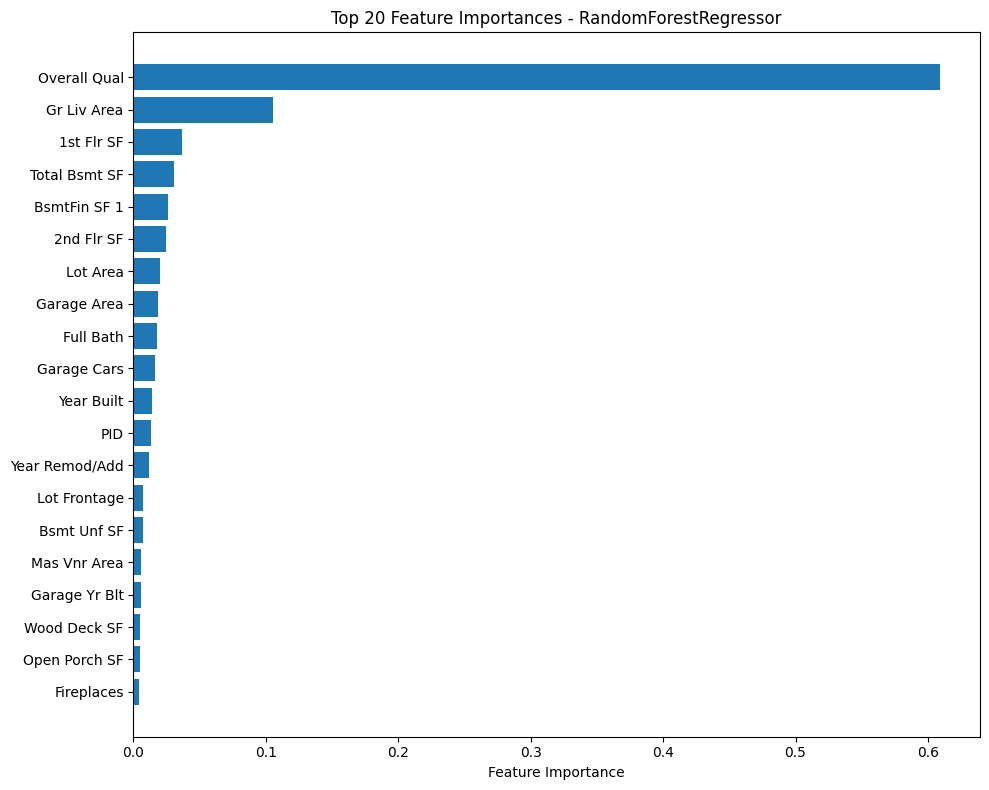


2️⃣ SHAP ANALYSIS

🎯 SHAP ANALYSIS - RandomForestRegressor
🔄 Creating SHAP explainer...
📊 Generating SHAP summary plots...


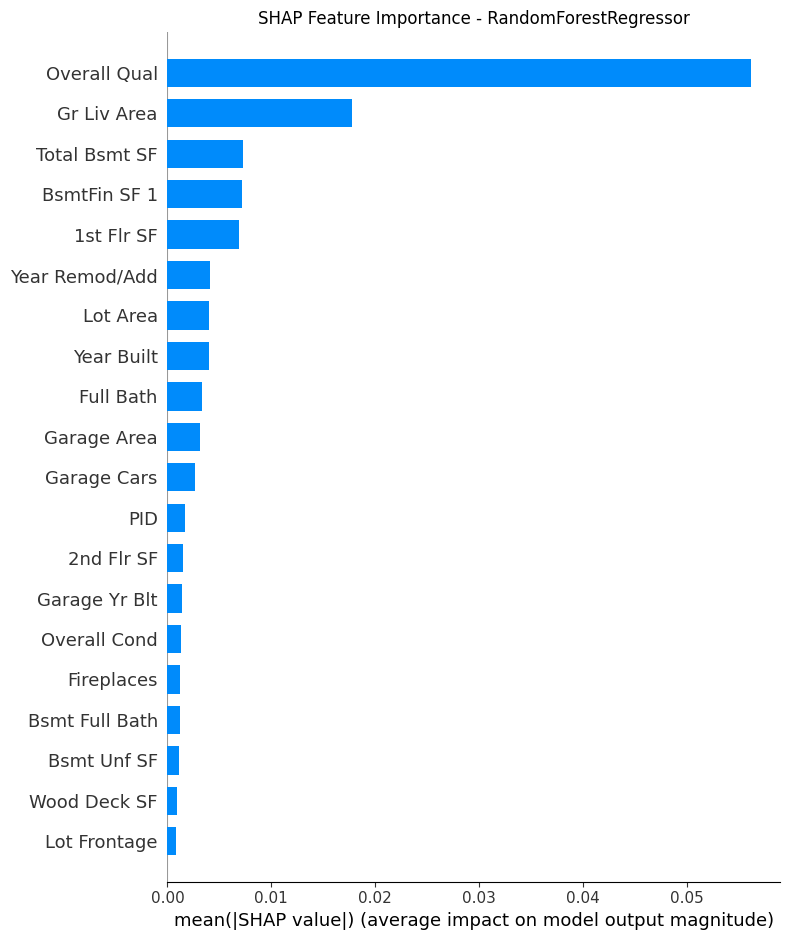

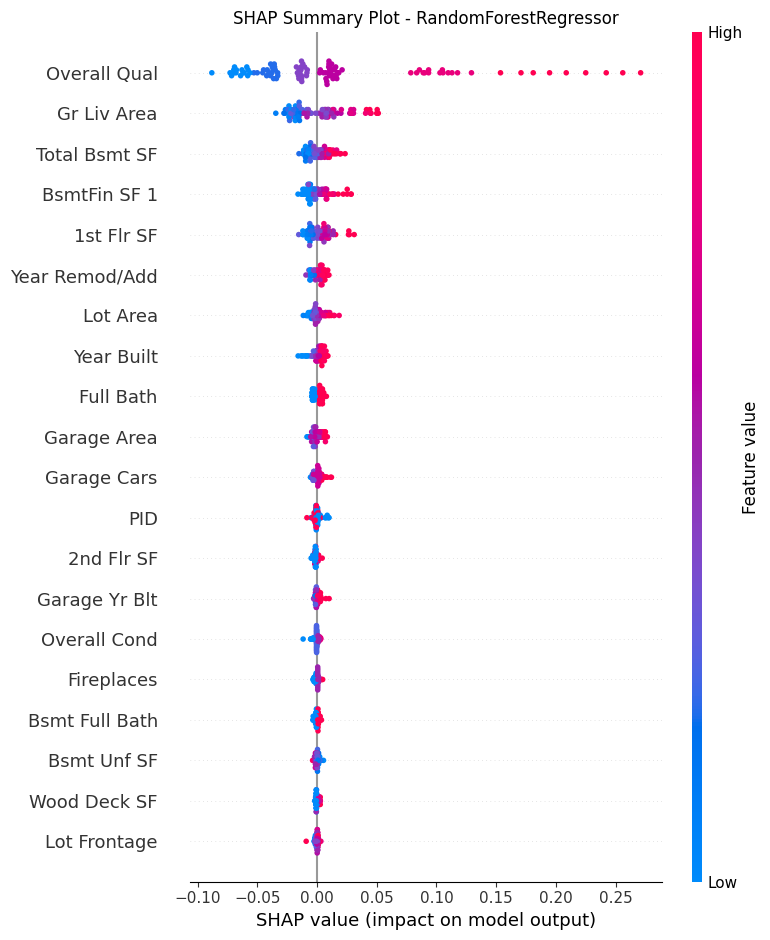

🔄 Analyzing feature interactions...


<Figure size 1200x1000 with 0 Axes>

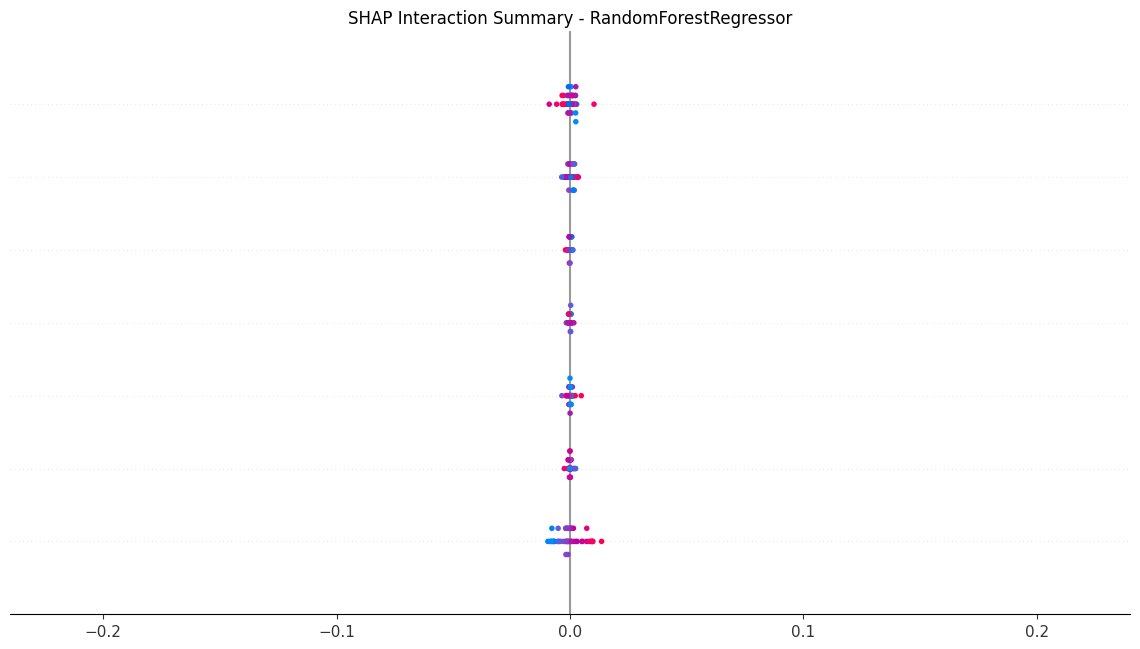


3️⃣ LIME LOCAL EXPLANATION
❌ LIME not available. Skipping LIME analysis.

4️⃣ PARTIAL DEPENDENCE PLOTS

📈 PARTIAL DEPENDENCE PLOTS - RandomForestRegressor


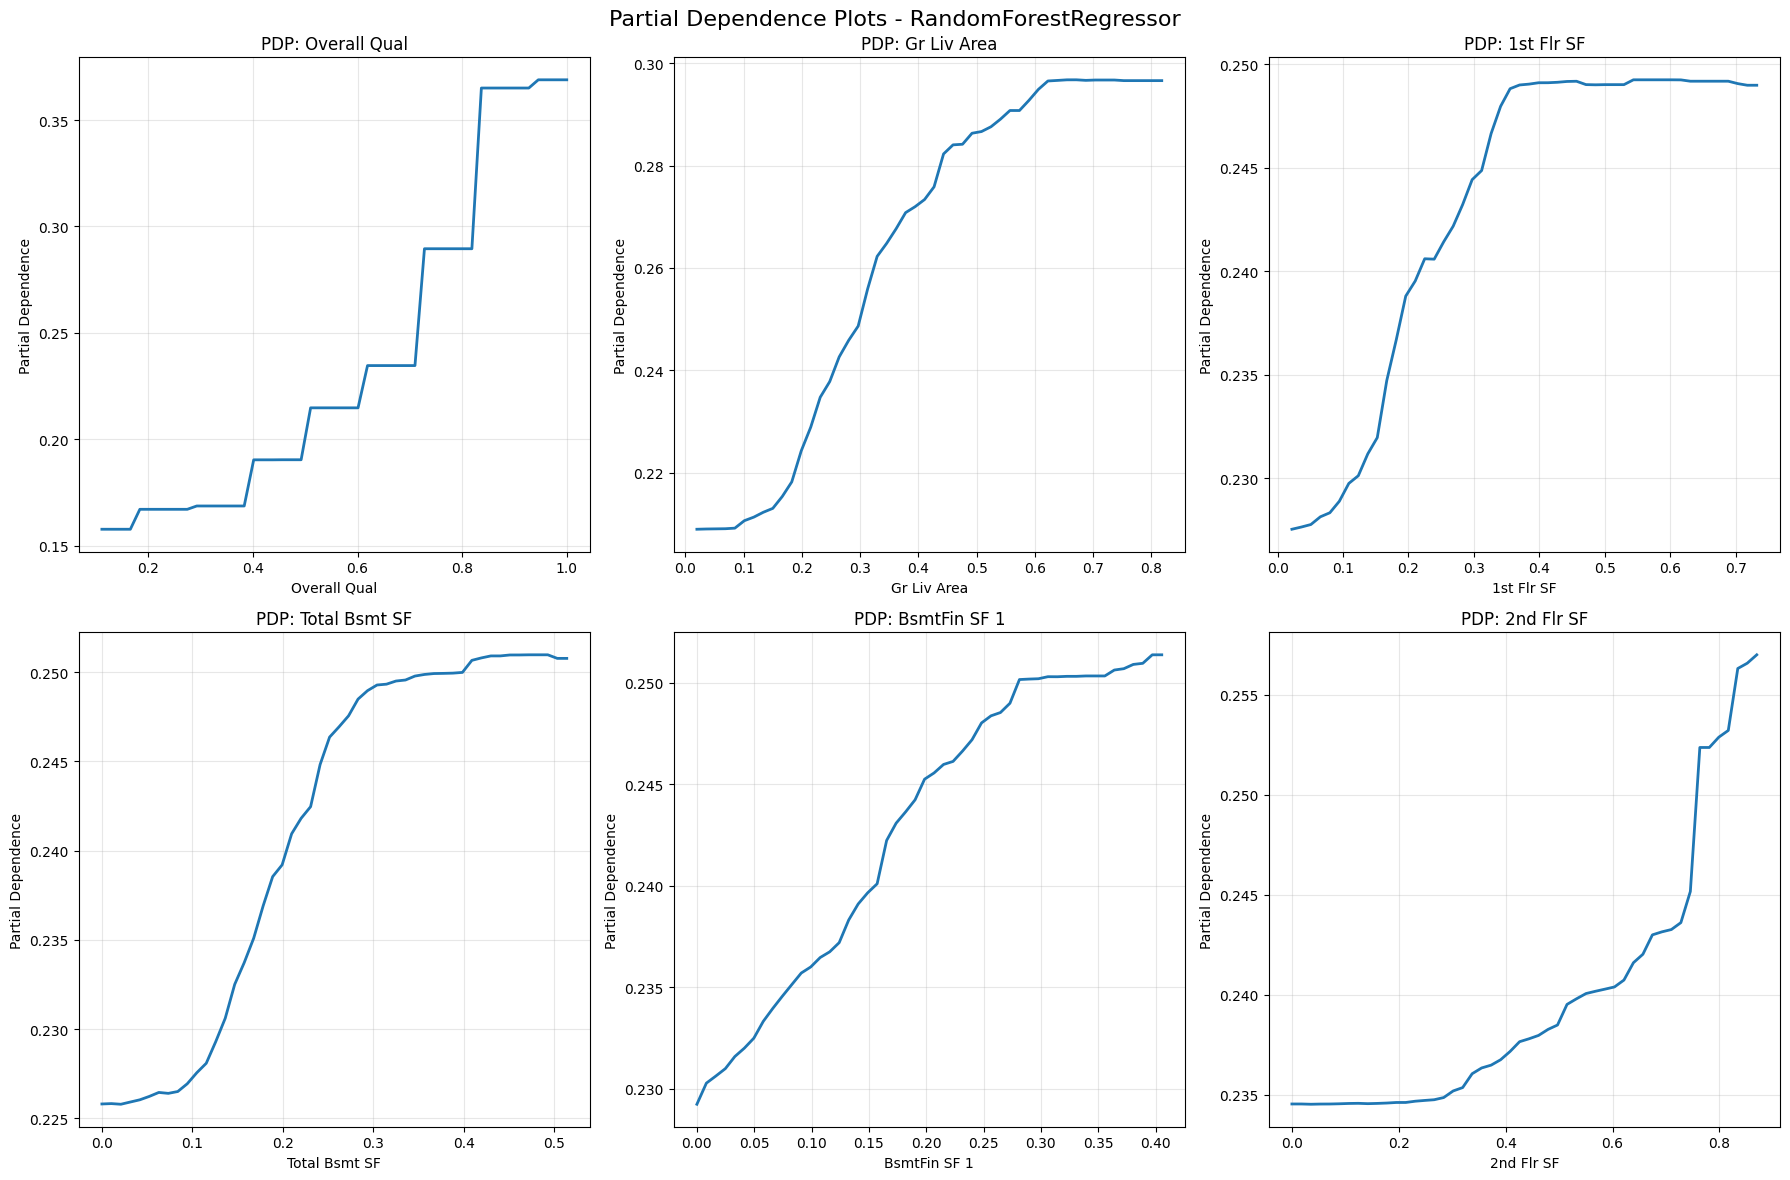


5️⃣ MODEL PERFORMANCE SUMMARY
📊 RandomForestRegressor Performance:
   - RMSE: $0
   - MAE: $0
   - R²: 0.911

🔗 Analyzing interaction between top 2 features...

🔗 FEATURE INTERACTION ANALYSIS - RandomForestRegressor
Analyzing interaction between: Overall Qual & Gr Liv Area
❌ PDP-Box not available for interaction plots

🚀 ANALYZING GRADIENT BOOSTING
🔄 Training GradientBoostingRegressor...
🎯 XAI Analyzer initialized for GradientBoostingRegressor

🎯 COMPREHENSIVE MODEL EXPLANATION - GradientBoostingRegressor
1️⃣ GLOBAL FEATURE IMPORTANCE

📊 GLOBAL FEATURE IMPORTANCE - GradientBoostingRegressor
🌳 Built-in Feature Importances (Top 15):
       Feature  Importance
  Overall Qual    0.533041
   Gr Liv Area    0.123137
   Garage Cars    0.062509
 Total Bsmt SF    0.048258
  BsmtFin SF 1    0.040071
    Year Built    0.037973
    2nd Flr SF    0.033846
    1st Flr SF    0.028754
Year Remod/Add    0.017284
      Lot Area    0.016072
    Fireplaces    0.015053
     Full Bath    0.014862
  Overall

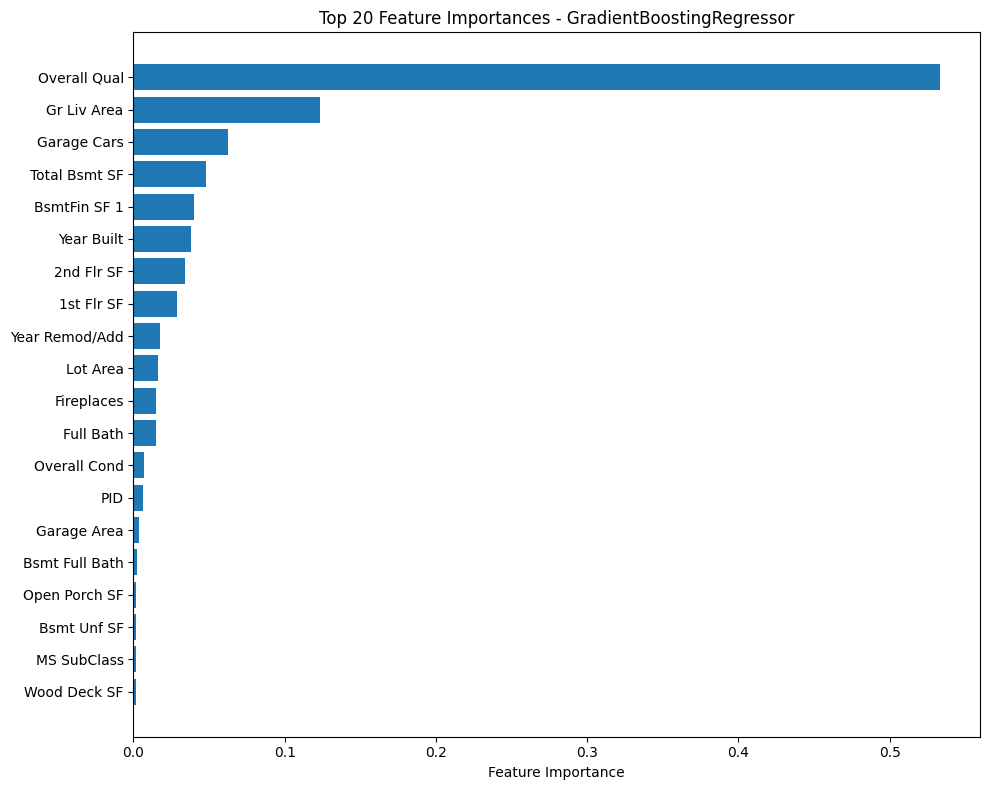


2️⃣ SHAP ANALYSIS

🎯 SHAP ANALYSIS - GradientBoostingRegressor
🔄 Creating SHAP explainer...
📊 Generating SHAP summary plots...


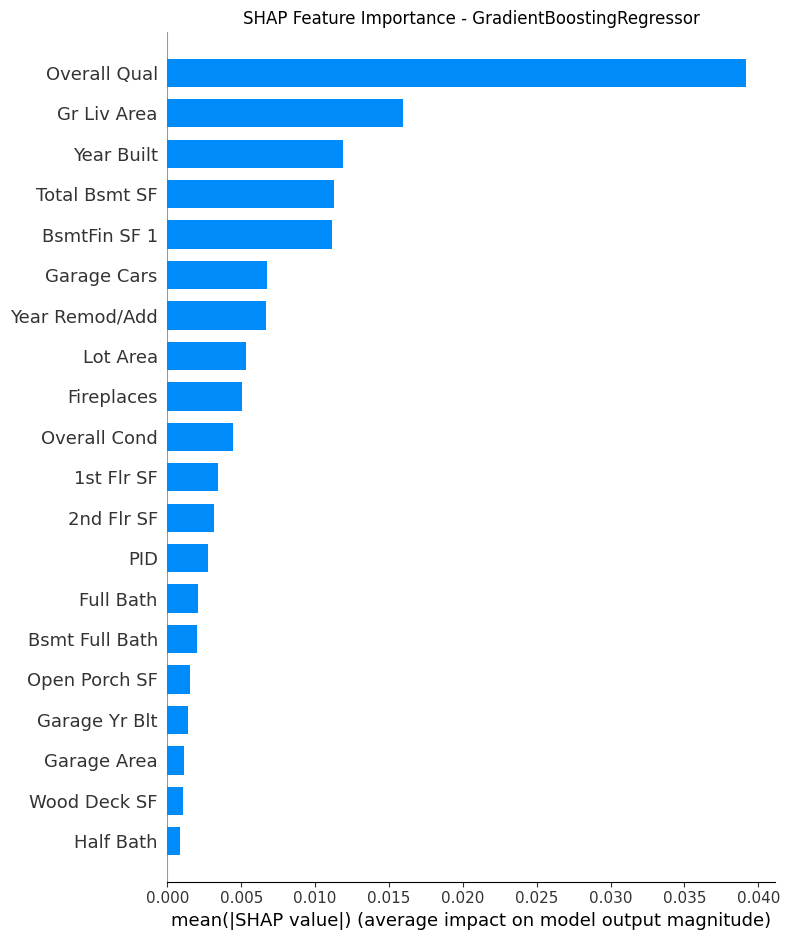

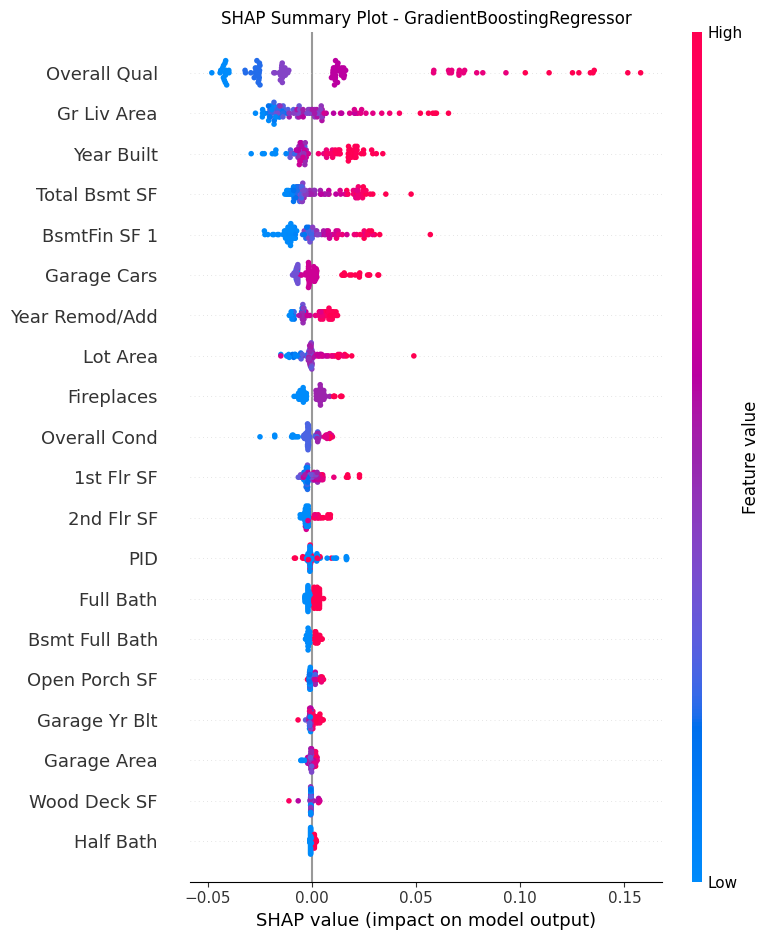

🔄 Analyzing feature interactions...


<Figure size 1200x1000 with 0 Axes>

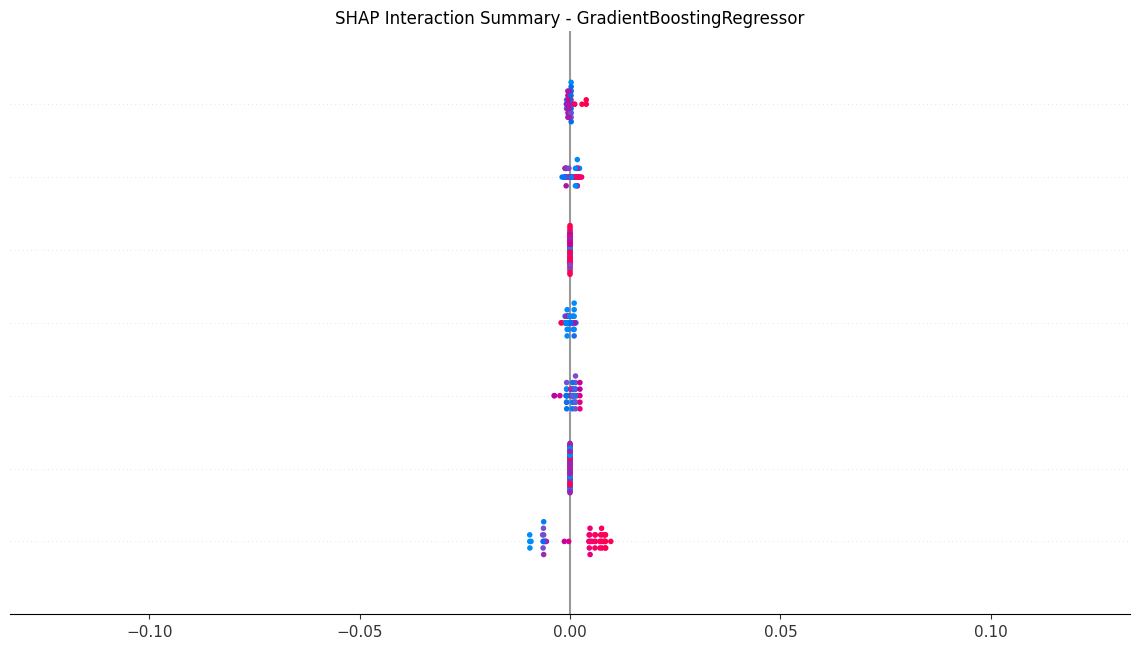


3️⃣ LIME LOCAL EXPLANATION
❌ LIME not available. Skipping LIME analysis.

4️⃣ PARTIAL DEPENDENCE PLOTS

📈 PARTIAL DEPENDENCE PLOTS - GradientBoostingRegressor


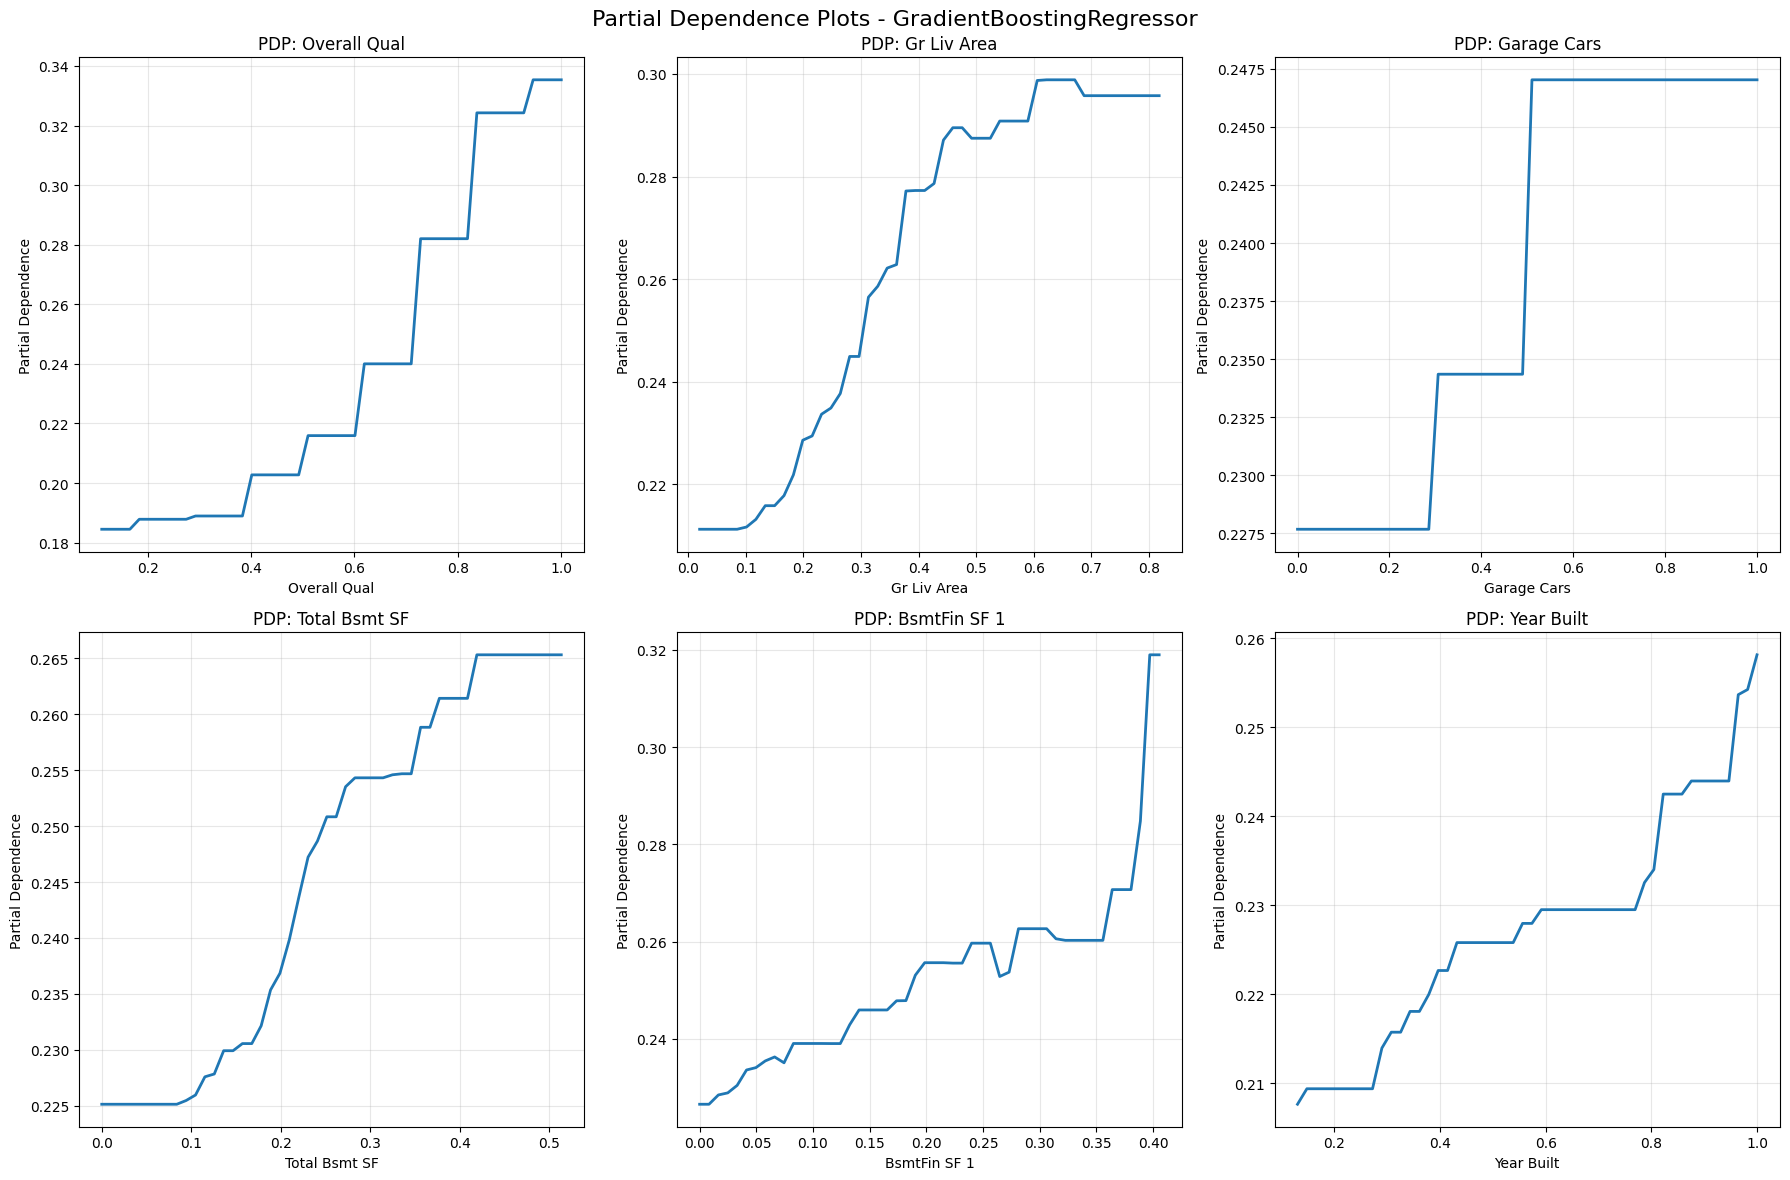


5️⃣ MODEL PERFORMANCE SUMMARY
📊 GradientBoostingRegressor Performance:
   - RMSE: $0
   - MAE: $0
   - R²: 0.912

🔗 Analyzing interaction between top 2 features...

🔗 FEATURE INTERACTION ANALYSIS - GradientBoostingRegressor
Analyzing interaction between: Overall Qual & Gr Liv Area
❌ PDP-Box not available for interaction plots

🚀 ANALYZING XGBOOST
🔄 Training XGBRegressor...
🎯 XAI Analyzer initialized for XGBRegressor

🎯 COMPREHENSIVE MODEL EXPLANATION - XGBRegressor
1️⃣ GLOBAL FEATURE IMPORTANCE

📊 GLOBAL FEATURE IMPORTANCE - XGBRegressor
🌳 Built-in Feature Importances (Top 15):
       Feature  Importance
  Overall Qual    0.631030
   Garage Cars    0.123711
   Gr Liv Area    0.050968
    1st Flr SF    0.022567
    2nd Flr SF    0.020318
 Total Bsmt SF    0.018255
    Fireplaces    0.017028
    Year Built    0.011452
Year Remod/Add    0.011219
Bsmt Full Bath    0.010988
  Overall Cond    0.010830
  BsmtFin SF 1    0.010750
      Lot Area    0.006305
 Open Porch SF    0.006117
 Kitchen 

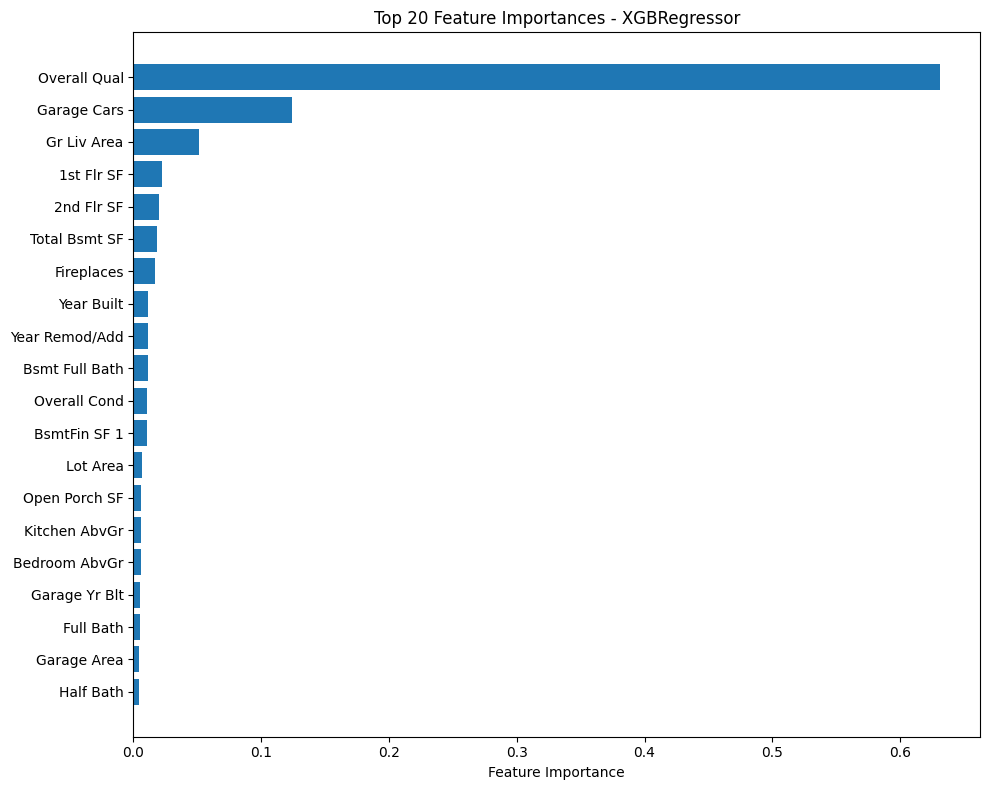


2️⃣ SHAP ANALYSIS

🎯 SHAP ANALYSIS - XGBRegressor
🔄 Creating SHAP explainer...
❌ Error in SHAP analysis: property 'feature_names_in_' of 'XGBRegressor' object has no setter

3️⃣ LIME LOCAL EXPLANATION
❌ LIME not available. Skipping LIME analysis.

4️⃣ PARTIAL DEPENDENCE PLOTS

📈 PARTIAL DEPENDENCE PLOTS - XGBRegressor


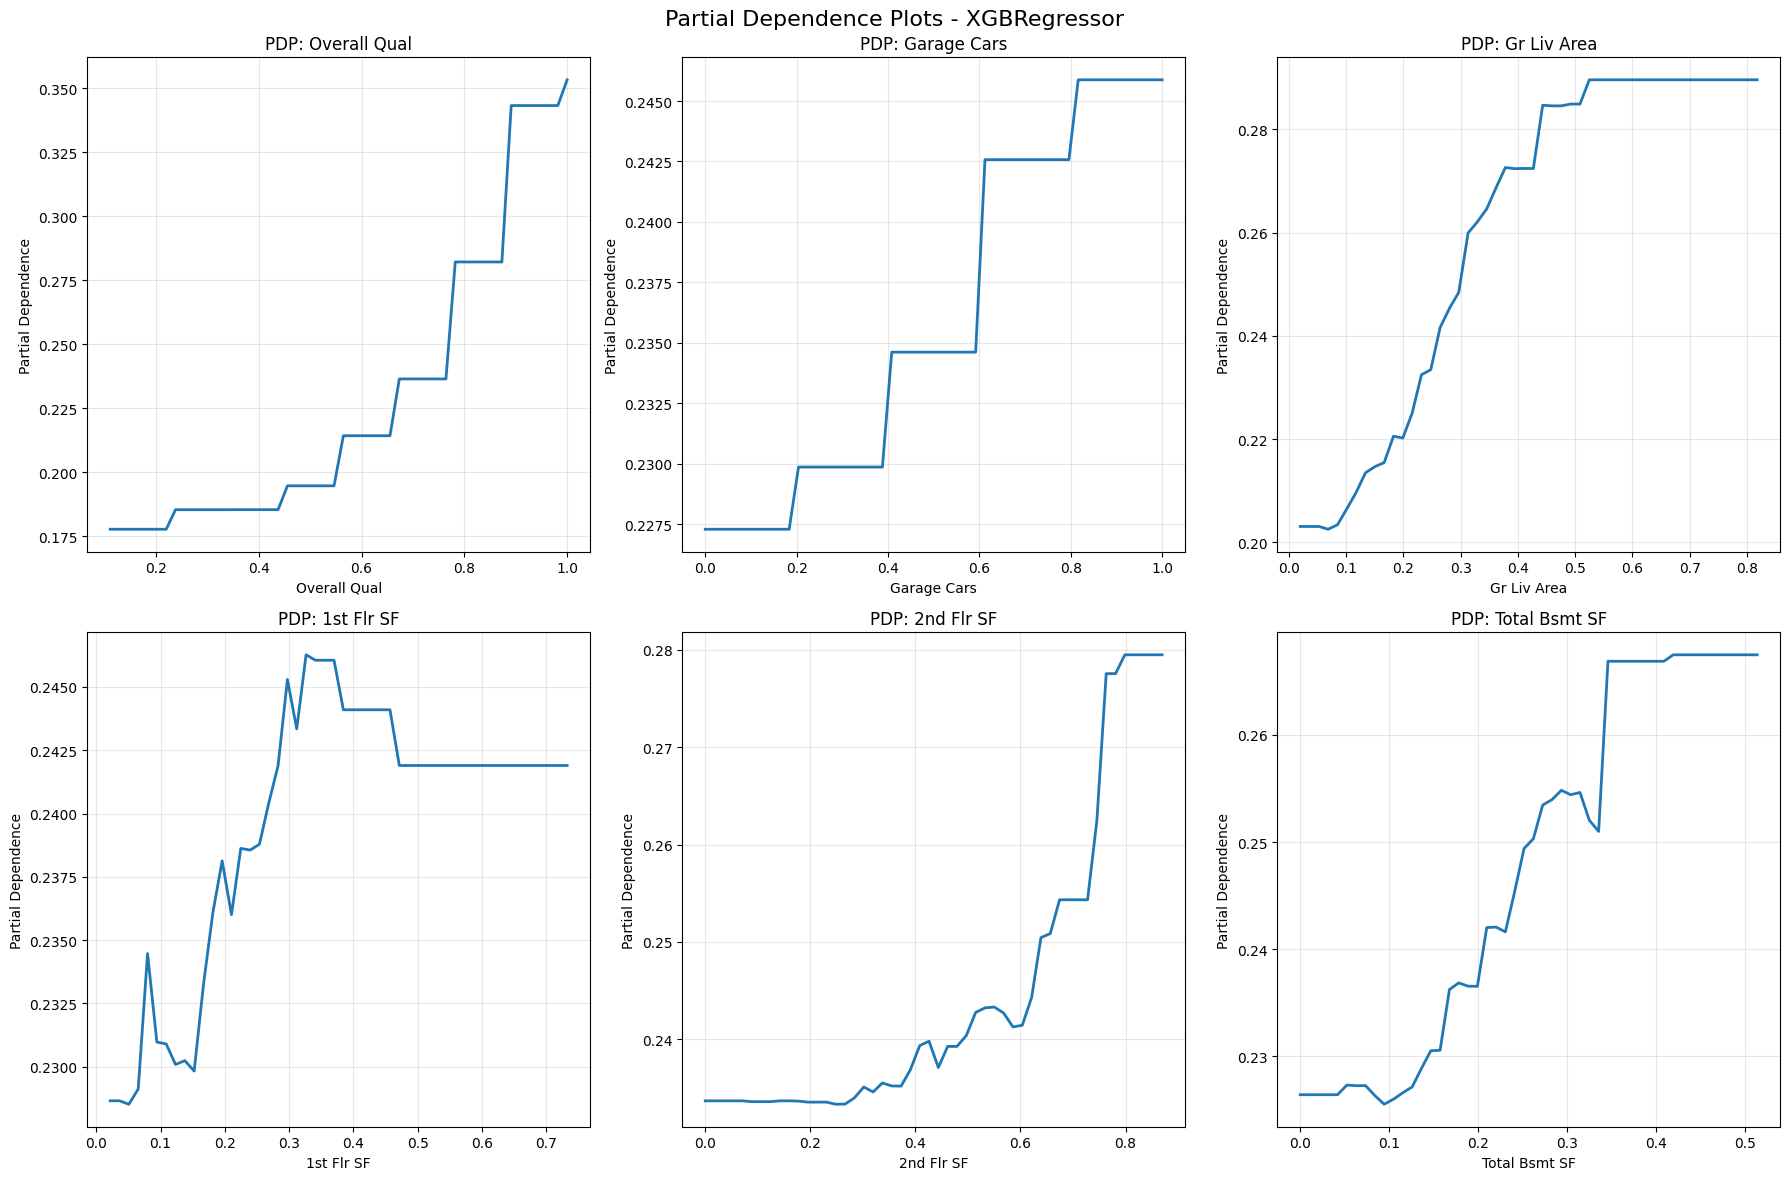


5️⃣ MODEL PERFORMANCE SUMMARY
📊 XGBRegressor Performance:
   - RMSE: $0
   - MAE: $0
   - R²: 0.926

🔗 Analyzing interaction between top 2 features...

🔗 FEATURE INTERACTION ANALYSIS - XGBRegressor
Analyzing interaction between: Overall Qual & Garage Cars
❌ PDP-Box not available for interaction plots

🚀 ANALYZING LIGHTGBM
🔄 Training LGBMRegressor...
🎯 XAI Analyzer initialized for LGBMRegressor

🎯 COMPREHENSIVE MODEL EXPLANATION - LGBMRegressor
1️⃣ GLOBAL FEATURE IMPORTANCE

📊 GLOBAL FEATURE IMPORTANCE - LGBMRegressor
🌳 Built-in Feature Importances (Top 15):
       Feature  Importance
   Gr Liv Area         272
      Lot Area         238
           PID         234
 Total Bsmt SF         210
   Garage Area         201
    1st Flr SF         189
  BsmtFin SF 1         165
    2nd Flr SF         140
 Open Porch SF         139
    Year Built         136
   Bsmt Unf SF         117
  Lot Frontage         116
  Mas Vnr Area         114
Year Remod/Add         107
  Wood Deck SF         105


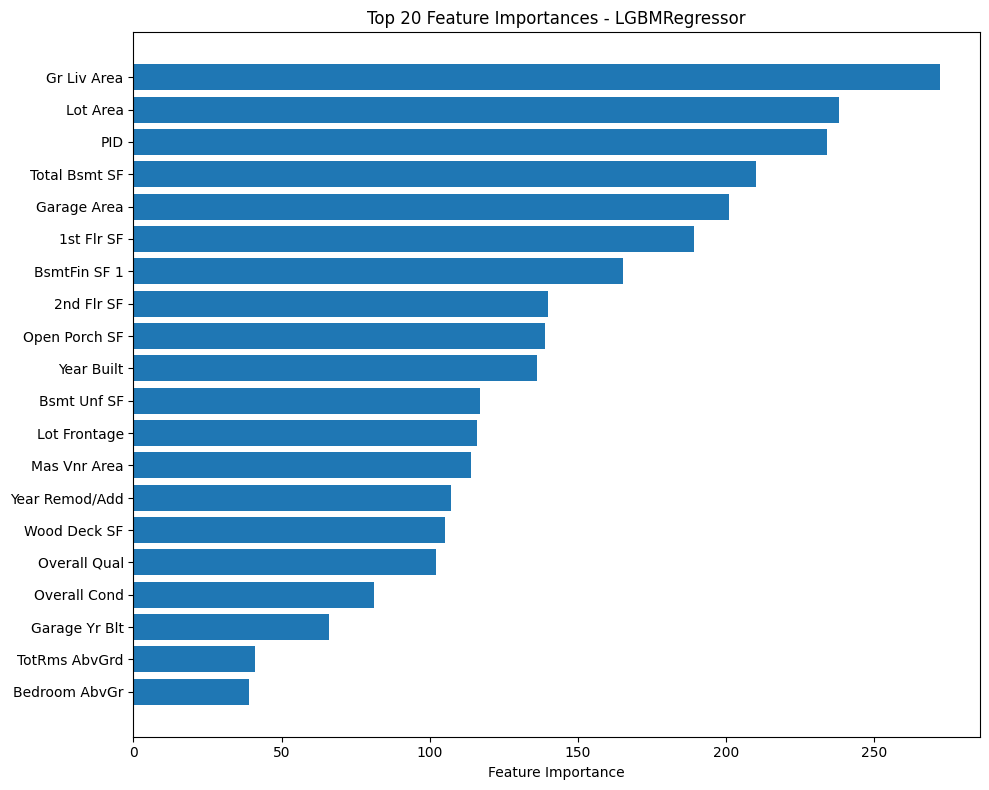


2️⃣ SHAP ANALYSIS

🎯 SHAP ANALYSIS - LGBMRegressor
🔄 Creating SHAP explainer...
❌ Error in SHAP analysis: property 'feature_names_in_' of 'LGBMRegressor' object has no setter

3️⃣ LIME LOCAL EXPLANATION
❌ LIME not available. Skipping LIME analysis.

4️⃣ PARTIAL DEPENDENCE PLOTS

📈 PARTIAL DEPENDENCE PLOTS - LGBMRegressor


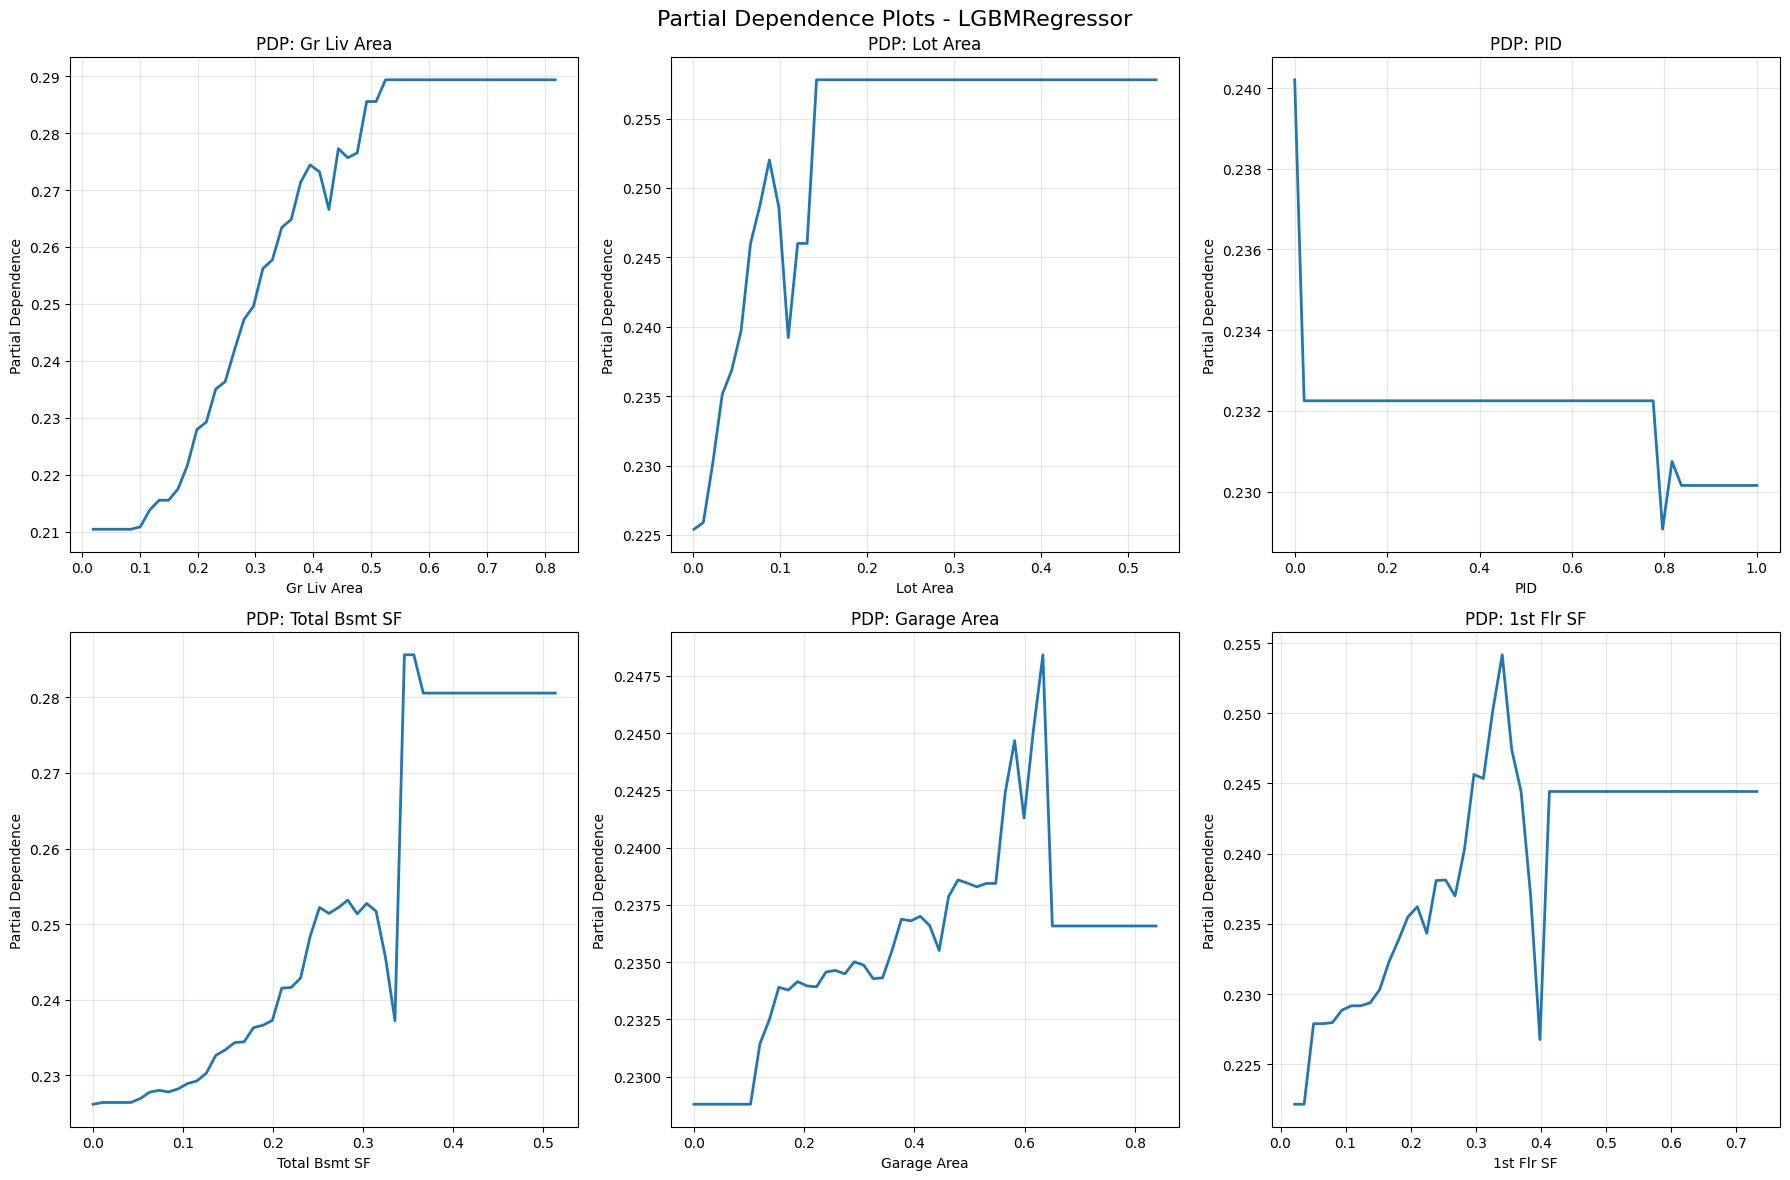


5️⃣ MODEL PERFORMANCE SUMMARY
📊 LGBMRegressor Performance:
   - RMSE: $0
   - MAE: $0
   - R²: 0.907

🔗 Analyzing interaction between top 2 features...

🔗 FEATURE INTERACTION ANALYSIS - LGBMRegressor
Analyzing interaction between: Gr Liv Area & Lot Area
❌ PDP-Box not available for interaction plots

✅ XAI ANALYSIS COMPLETED!

📋 XAI ANALYSIS SUMMARY

Random Forest:
  - RMSE: $0
  - R²: 0.911

Gradient Boosting:
  - RMSE: $0
  - R²: 0.912

XGBoost:
  - RMSE: $0
  - R²: 0.926

LightGBM:
  - RMSE: $0
  - R²: 0.907

🎉 All XAI analyses completed!
Results stored in 'xai_results' variable


In [23]:
# ==========================================
# EXPLAINABLE AI (XAI) FOR BLACK-BOX MODELS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Install required packages if not already installed
# !pip install shap lime eli5 pdpbox

try:
    import shap
    SHAP_AVAILABLE = True
    print("✅ SHAP library loaded successfully")
except ImportError:
    print("❌ SHAP not available. Install with: pip install shap")
    SHAP_AVAILABLE = False

try:
    import lime
    from lime import lime_tabular
    LIME_AVAILABLE = True
    print("✅ LIME library loaded successfully")
except ImportError:
    print("❌ LIME not available. Install with: pip install lime")
    LIME_AVAILABLE = False

try:
    import eli5
    from eli5.sklearn import PermutationImportance
    ELI5_AVAILABLE = True
    print("✅ ELI5 library loaded successfully")
except ImportError:
    print("❌ ELI5 not available. Install with: pip install eli5")
    ELI5_AVAILABLE = False

try:
    from pdpbox import pdp, get_dataset, info_plots
    PDP_AVAILABLE = True
    print("✅ PDP-Box library loaded successfully")
except ImportError:
    print("❌ PDP-Box not available. Install with: pip install pdpbox")
    PDP_AVAILABLE = False

class XAIAnalyzer:
    """
    Comprehensive XAI analyzer for black-box models
    """

    def __init__(self, model, X_train, X_test, y_train, y_test, feature_names):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = feature_names
        self.model_name = type(model).__name__

        # Fit the model if not already fitted
        try:
            self.model.predict(X_test[:1])
        except:
            print(f"🔄 Training {self.model_name}...")
            self.model.fit(X_train, y_train)

        print(f"🎯 XAI Analyzer initialized for {self.model_name}")

    def global_feature_importance(self):
        """Global feature importance analysis"""
        print(f"\n📊 GLOBAL FEATURE IMPORTANCE - {self.model_name}")
        print("=" * 60)

        # 1. Built-in feature importance (for tree-based models)
        if hasattr(self.model, 'feature_importances_'):
            importances = pd.DataFrame({
                'Feature': self.feature_names,
                'Importance': self.model.feature_importances_
            }).sort_values('Importance', ascending=False)

            print("🌳 Built-in Feature Importances (Top 15):")
            print(importances.head(15).to_string(index=False))

            # Plot feature importance
            plt.figure(figsize=(10, 8))
            top_features = importances.head(20)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Feature Importance')
            plt.title(f'Top 20 Feature Importances - {self.model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

        # 2. Permutation Importance (more reliable)
        if ELI5_AVAILABLE:
            print("\n🔄 Calculating Permutation Importance...")
            perm_importance = PermutationImportance(
                self.model, random_state=42
            ).fit(self.X_test, self.y_test)

            perm_df = pd.DataFrame({
                'Feature': self.feature_names,
                'Perm_Importance': perm_importance.feature_importances_,
                'Perm_Std': perm_importance.feature_importances_std_
            }).sort_values('Perm_Importance', ascending=False)

            print("🎲 Permutation Importance (Top 15):")
            print(perm_df.head(15).round(4).to_string(index=False))

            # Plot permutation importance
            plt.figure(figsize=(10, 8))
            top_perm = perm_df.head(20)
            plt.barh(range(len(top_perm)), top_perm['Perm_Importance'])
            plt.yticks(range(len(top_perm)), top_perm['Feature'])
            plt.xlabel('Permutation Importance')
            plt.title(f'Top 20 Permutation Importances - {self.model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

            return perm_df

    def shap_analysis(self, sample_size=100):
        """SHAP (SHapley Additive exPlanations) analysis"""
        if not SHAP_AVAILABLE:
            print("❌ SHAP not available. Skipping SHAP analysis.")
            return

        print(f"\n🎯 SHAP ANALYSIS - {self.model_name}")
        print("=" * 60)

        # Sample data for faster computation
        X_sample = self.X_test.sample(n=min(sample_size, len(self.X_test)), random_state=42)

        try:
            # Create SHAP explainer
            print("🔄 Creating SHAP explainer...")
            if 'RandomForest' in self.model_name or 'GradientBoosting' in self.model_name:
                explainer = shap.TreeExplainer(self.model)
                shap_values = explainer.shap_values(X_sample)
            else:
                # For other models, use KernelExplainer (slower but universal)
                explainer = shap.KernelExplainer(
                    self.model.predict,
                    self.X_train.sample(n=min(100, len(self.X_train)), random_state=42)
                )
                shap_values = explainer.shap_values(X_sample)

            # Global SHAP summary
            print("📊 Generating SHAP summary plots...")

            # Summary plot (bar)
            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
            plt.title(f'SHAP Feature Importance - {self.model_name}')
            plt.tight_layout()
            plt.show()

            # Summary plot (beeswarm)
            plt.figure(figsize=(10, 8))
            shap.summary_plot(shap_values, X_sample, show=False)
            plt.title(f'SHAP Summary Plot - {self.model_name}')
            plt.tight_layout()
            plt.show()

            # Feature interaction
            print("🔄 Analyzing feature interactions...")
            shap_interaction_values = explainer.shap_interaction_values(X_sample[:50])  # Smaller sample for interactions

            plt.figure(figsize=(12, 10))
            shap.summary_plot(shap_interaction_values, X_sample[:50], show=False)
            plt.title(f'SHAP Interaction Summary - {self.model_name}')
            plt.tight_layout()
            plt.show()

            return shap_values, explainer

        except Exception as e:
            print(f"❌ Error in SHAP analysis: {str(e)}")
            return None, None

    def lime_analysis(self, instance_idx=0, num_features=15):
        """LIME (Local Interpretable Model-agnostic Explanations) analysis"""
        if not LIME_AVAILABLE:
            print("❌ LIME not available. Skipping LIME analysis.")
            return

        print(f"\n🍋 LIME ANALYSIS - {self.model_name}")
        print("=" * 60)

        try:
            # Create LIME explainer
            explainer = lime_tabular.LimeTabularExplainer(
                self.X_train.values,
                feature_names=self.feature_names,
                mode='regression',
                random_state=42
            )

            # Explain a specific instance
            instance = self.X_test.iloc[instance_idx].values
            actual_value = self.y_test.iloc[instance_idx]
            predicted_value = self.model.predict([instance])[0]

            print(f"🎯 Explaining instance {instance_idx}:")
            print(f"   Actual value: ${actual_value:,.0f}")
            print(f"   Predicted value: ${predicted_value:,.0f}")

            # Generate explanation
            explanation = explainer.explain_instance(
                instance,
                self.model.predict,
                num_features=num_features
            )

            # Show explanation
            explanation.show_in_notebook(show_table=True)

            # Plot explanation
            fig = explanation.as_pyplot_figure()
            fig.suptitle(f'LIME Explanation - {self.model_name} (Instance {instance_idx})')
            plt.tight_layout()
            plt.show()

            return explanation

        except Exception as e:
            print(f"❌ Error in LIME analysis: {str(e)}")
            return None

    def partial_dependence_plots(self, top_features=6):
        """Partial Dependence Plots (PDP) analysis"""
        print(f"\n📈 PARTIAL DEPENDENCE PLOTS - {self.model_name}")
        print("=" * 60)

        # Get top features from built-in importance or use first few features
        if hasattr(self.model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'Feature': self.feature_names,
                'Importance': self.model.feature_importances_
            }).sort_values('Importance', ascending=False)

            top_feature_names = feature_importance.head(top_features)['Feature'].tolist()
        else:
            top_feature_names = self.feature_names[:top_features]

        # Create PDP plots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()

        for i, feature in enumerate(top_feature_names):
            if i >= 6:  # Limit to 6 plots
                break

            try:
                if PDP_AVAILABLE:
                    # Using pdpbox
                    pdp_feature = pdp.pdp_isolate(
                        model=self.model,
                        dataset=self.X_test,
                        model_features=self.feature_names,
                        feature=feature
                    )

                    pdp.pdp_plot(pdp_feature, feature, ax=axes[i])
                    axes[i].set_title(f'PDP: {feature}')
                else:
                    # Manual PDP calculation
                    feature_idx = list(self.feature_names).index(feature)
                    feature_values = np.linspace(
                        self.X_test.iloc[:, feature_idx].min(),
                        self.X_test.iloc[:, feature_idx].max(),
                        50
                    )

                    pdp_values = []
                    for val in feature_values:
                        X_temp = self.X_test.copy()
                        X_temp.iloc[:, feature_idx] = val
                        pdp_values.append(self.model.predict(X_temp).mean())

                    axes[i].plot(feature_values, pdp_values, linewidth=2)
                    axes[i].set_xlabel(feature)
                    axes[i].set_ylabel('Partial Dependence')
                    axes[i].set_title(f'PDP: {feature}')
                    axes[i].grid(True, alpha=0.3)

            except Exception as e:
                print(f"❌ Error creating PDP for {feature}: {str(e)}")
                continue

        plt.suptitle(f'Partial Dependence Plots - {self.model_name}', fontsize=16)
        plt.tight_layout()
        plt.show()

    def feature_interaction_analysis(self, feature1, feature2):
        """2D Partial Dependence Plot for feature interactions"""
        print(f"\n🔗 FEATURE INTERACTION ANALYSIS - {self.model_name}")
        print(f"Analyzing interaction between: {feature1} & {feature2}")
        print("=" * 60)

        try:
            if PDP_AVAILABLE:
                # Using pdpbox for 2D PDP
                pdp_interact = pdp.pdp_interact(
                    model=self.model,
                    dataset=self.X_test,
                    model_features=self.feature_names,
                    features=[feature1, feature2]
                )

                fig, axes = plt.subplots(1, 2, figsize=(15, 6))

                # Contour plot
                pdp.pdp_interact_plot(
                    pdp_interact, [feature1, feature2],
                    plot_type='contour', ax=axes[0]
                )
                axes[0].set_title(f'PDP Interaction Contour: {feature1} vs {feature2}')

                # Grid plot
                pdp.pdp_interact_plot(
                    pdp_interact, [feature1, feature2],
                    plot_type='grid', ax=axes[1]
                )
                axes[1].set_title(f'PDP Interaction Grid: {feature1} vs {feature2}')

                plt.tight_layout()
                plt.show()
            else:
                print("❌ PDP-Box not available for interaction plots")

        except Exception as e:
            print(f"❌ Error in interaction analysis: {str(e)}")

    def comprehensive_explanation(self, instance_idx=0):
        """Comprehensive explanation combining multiple XAI techniques"""
        print(f"\n🎯 COMPREHENSIVE MODEL EXPLANATION - {self.model_name}")
        print("=" * 80)

        # 1. Global Feature Importance
        print("1️⃣ GLOBAL FEATURE IMPORTANCE")
        perm_importance = self.global_feature_importance()

        # 2. SHAP Analysis
        print("\n2️⃣ SHAP ANALYSIS")
        shap_values, shap_explainer = self.shap_analysis(sample_size=100)

        # 3. LIME Analysis
        print("\n3️⃣ LIME LOCAL EXPLANATION")
        lime_explanation = self.lime_analysis(instance_idx=instance_idx)

        # 4. Partial Dependence Plots
        print("\n4️⃣ PARTIAL DEPENDENCE PLOTS")
        self.partial_dependence_plots(top_features=6)

        # 5. Model Performance Summary
        print("\n5️⃣ MODEL PERFORMANCE SUMMARY")
        y_pred = self.model.predict(self.X_test)
        from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

        rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
        mae = mean_absolute_error(self.y_test, y_pred)
        r2 = r2_score(self.y_test, y_pred)

        print(f"📊 {self.model_name} Performance:")
        print(f"   - RMSE: ${rmse:,.0f}")
        print(f"   - MAE: ${mae:,.0f}")
        print(f"   - R²: {r2:.3f}")

        return {
            'permutation_importance': perm_importance,
            'shap_values': shap_values,
            'shap_explainer': shap_explainer,
            'lime_explanation': lime_explanation,
            'performance_metrics': {'rmse': rmse, 'mae': mae, 'r2': r2}
        }

# ==========================================
# MAIN EXECUTION FUNCTION
# ==========================================

def run_xai_analysis(df, target_col, selected_features):
    """Run comprehensive XAI analysis on black-box models"""

    print("🎯 STARTING XAI ANALYSIS FOR BLACK-BOX MODELS")
    print("=" * 80)

    # Prepare data
    feature_cols = [col for col in selected_features if col in df.columns]
    X = df[feature_cols]
    y = df[target_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"📊 Data prepared:")
    print(f"   - Features: {len(feature_cols)}")
    print(f"   - Training samples: {len(X_train)}")
    print(f"   - Test samples: {len(X_test)}")

    # Define black-box models to analyze
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    # Add advanced models if available
    try:
        import xgboost as xgb
        models['XGBoost'] = xgb.XGBRegressor(
            n_estimators=100, random_state=42, eval_metric='rmse'
        )
    except ImportError:
        pass

    try:
        import lightgbm as lgb
        models['LightGBM'] = lgb.LGBMRegressor(
            n_estimators=100, random_state=42, verbose=-1
        )
    except ImportError:
        pass

    # Analyze each model
    xai_results = {}

    for model_name, model in models.items():
        print(f"\n🚀 ANALYZING {model_name.upper()}")
        print("=" * 60)

        # Initialize XAI analyzer
        analyzer = XAIAnalyzer(
            model=model,
            X_train=X_train,
            X_test=X_test,
            y_train=y_train,
            y_test=y_test,
            feature_names=feature_cols
        )

        # Run comprehensive analysis
        results = analyzer.comprehensive_explanation(instance_idx=0)
        xai_results[model_name] = results

        # Feature interaction analysis for top 2 features
        if hasattr(model, 'feature_importances_'):
            top_features = pd.DataFrame({
                'Feature': feature_cols,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False).head(2)['Feature'].tolist()

            if len(top_features) >= 2:
                print(f"\n🔗 Analyzing interaction between top 2 features...")
                analyzer.feature_interaction_analysis(top_features[0], top_features[1])

    print("\n✅ XAI ANALYSIS COMPLETED!")
    print("=" * 80)

    return xai_results

# ==========================================
# EXECUTION
# ==========================================

# Assuming you have already run your feature selection
# and have 'features_selected' variable available

if __name__ == "__main__":
    # Make sure you have your preprocessed dataframe and selected features
    target_column = 'SalePrice'

    # If features_selected is not available, create a basic selection
    if 'features_selected' not in locals():
        print("⚠️ features_selected not found. Using basic feature selection...")
        # Use numerical columns as features (excluding target and ID columns)
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        features_selected = [col for col in numerical_cols
                           if col not in [target_column, 'Order']][:30]  # Top 30

    print(f"🎯 Using {len(features_selected)} selected features")
    print(f"Target column: {target_column}")

    # Run XAI analysis
    xai_results = run_xai_analysis(df, target_column, features_selected)

    print("\n📋 XAI ANALYSIS SUMMARY")
    print("=" * 40)
    for model_name, results in xai_results.items():
        metrics = results['performance_metrics']
        print(f"\n{model_name}:")
        print(f"  - RMSE: ${metrics['rmse']:,.0f}")
        print(f"  - R²: {metrics['r2']:.3f}")

    print("\n🎉 All XAI analyses completed!")
    print("Results stored in 'xai_results' variable")

## **Ensemble model using best models from model comparison**

Linear Regression R-squared: 0.8798
Linear Regression RMSE: 0.0418
Linear Regression MAE: 0.0264
Ridge Regression R-squared: 0.8799
Ridge Regression RMSE: 0.0418
Ridge Regression MAE: 0.0264
CatBoost R-squared: 0.8940
CatBoost RMSE: 0.0393
CatBoost MAE: 0.0232
Ensemble Model R-squared: 0.8969
Ensemble Model RMSE: 0.0387
Ensemble Model MAE: 0.0233


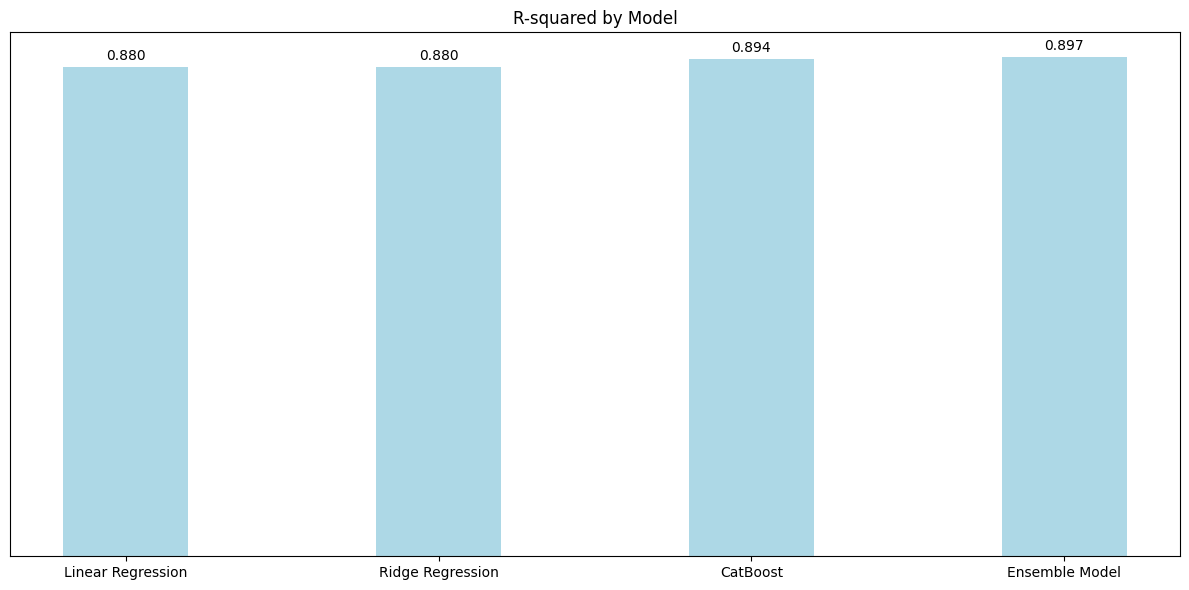

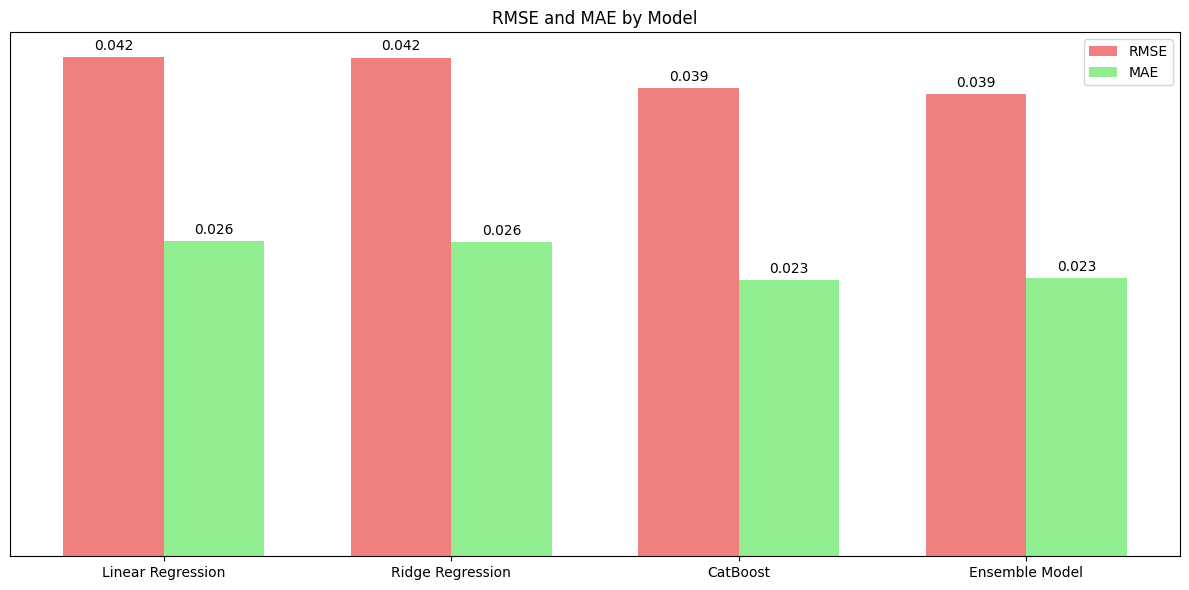

In [24]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from catboost import CatBoostRegressor  # Import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Define the base models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
catboost_model = CatBoostRegressor(iterations=100, random_state=42, verbose=0)  # Use CatBoostRegressor

# Train the base models
linear_model.fit(X_train_final, y_train)
ridge_model.fit(X_train_final, y_train)
catboost_model.fit(X_train_final, y_train)  # Train CatBoost model

# Create the ensemble model
ensemble_model = VotingRegressor(estimators=[('linear', linear_model), ('ridge', ridge_model), ('catboost', catboost_model)], weights=[1, 1, 2])

# Train the ensemble model
ensemble_model.fit(X_train_final, y_train)

# Make predictions
linear_pred = linear_model.predict(X_test_final)
ridge_pred = ridge_model.predict(X_test_final)
catboost_pred = catboost_model.predict(X_test_final)  # Predictions from CatBoost
ensemble_pred = ensemble_model.predict(X_test_final)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} R-squared: {r2:.4f}')
    print(f'{model_name} RMSE: {rmse:.4f}')
    print(f'{model_name} MAE: {mae:.4f}')
    return r2, rmse, mae

linear_r2, linear_rmse, linear_mae = evaluate_model(y_test, linear_pred, 'Linear Regression')
ridge_r2, ridge_rmse, ridge_mae = evaluate_model(y_test, ridge_pred, 'Ridge Regression')
catboost_r2, catboost_rmse, catboost_mae = evaluate_model(y_test, catboost_pred, 'CatBoost')  # Evaluate CatBoost
ensemble_r2, ensemble_rmse, ensemble_mae = evaluate_model(y_test, ensemble_pred, 'Ensemble Model')

# Plotting R-squared
model_names = ['Linear Regression', 'Ridge Regression', 'CatBoost', 'Ensemble Model']
r2_scores = [linear_r2, ridge_r2, catboost_r2, ensemble_r2]

x = np.arange(len(model_names))

fig, ax1 = plt.subplots(figsize=(12, 6))
rects1 = ax1.bar(x, r2_scores, width=0.4, label='R-squared', color='lightblue')

ax1.set_ylabel('R-squared')
ax1.set_title('R-squared by Model')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.yaxis.set_visible(False)  # Hide y-axis values

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height formatted to 3 decimals."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1, ax1)

plt.tight_layout()
plt.show()

# Plotting RMSE and MAE
rmse_scores = [linear_rmse, ridge_rmse, catboost_rmse, ensemble_rmse]  # Update RMSE scores
mae_scores = [linear_mae, ridge_mae, catboost_mae, ensemble_mae]  # Update MAE scores

fig, ax2 = plt.subplots(figsize=(12, 6))
width = 0.35  # Width of the bars

x = np.arange(len(model_names))

rects1 = ax2.bar(x - width/2, rmse_scores, width, label='RMSE', color='lightcoral')
rects2 = ax2.bar(x + width/2, mae_scores, width, label='MAE', color='lightgreen')

ax2.set_ylabel('Scores')
ax2.set_title('RMSE and MAE by Model')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)
ax2.yaxis.set_visible(False)  # Hide y-axis values
ax2.legend()

# Adding labels for RMSE and MAE
autolabel(rects1, ax2)  # RMSE bars
autolabel(rects2, ax2)  # MAE bars

plt.tight_layout()
plt.show()
